# <font color='red'><u><b>....Lending Club Case Study....</font>
## <font color='brown'><b><i> Note :- <font color='#4b0082'>Internet connection is mandatory for successful running of this notebook. This notebook may take some time to run depending on system specifications and internet connectivity. <font color='red'>!!!<br>

## <font color='#006666'><b><u>Contents :-
>- ### <font color='#334d00'><b>Data Loading<br>
>- ### <font color='#334d00'><b>Data Cleaning and Manipulation<br>
>- ### <font color='#334d00'><b><u>Data Analysis
>>#### <font color='brown'><b>1) Funded amount Analysis
>>#### <font color='brown'><b>2) Annual Income Analysis
>>#### <font color='brown'><b>3) Due Analysis
>>#### <font color='brown'><b>4) State Analysis
>>#### <font color='brown'><b>5) Time and Date Analysis
>>#### <font color='brown'><b>6) Home Ownership Analysis
>>#### <font color='brown'><b>7) Grade Analysis<br>
>- ### <font color='#334d00'><b>Recommendations

## <font color='blue'><u>Data Loading

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
inp = pd.read_csv('loan.csv')

/home/tuhin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
inp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Selecting certain features to work on
df=inp[['id','member_id','loan_amnt','loan_status','funded_amnt','term','int_rate','installment','last_pymnt_amnt','last_pymnt_d','annual_inc','addr_state','total_pymnt','home_ownership','issue_d','dti','grade']]
df.head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,annual_inc,addr_state,total_pymnt,home_ownership,issue_d,dti,grade
0,1077501,1296599,5000,Fully Paid,5000,36 months,10.65%,162.87,171.62,Jan-15,24000.0,AZ,5863.155187,RENT,Dec-11,27.65,B
1,1077430,1314167,2500,Charged Off,2500,60 months,15.27%,59.83,119.66,Apr-13,30000.0,GA,1008.710000,RENT,Dec-11,1.00,C
2,1077175,1313524,2400,Fully Paid,2400,36 months,15.96%,84.33,649.91,Jun-14,12252.0,IL,3005.666844,RENT,Dec-11,8.72,C
3,1076863,1277178,10000,Fully Paid,10000,36 months,13.49%,339.31,357.48,Jan-15,49200.0,CA,12231.890000,RENT,Dec-11,20.00,C
4,1075358,1311748,3000,Current,3000,60 months,12.69%,67.79,67.79,May-16,80000.0,OR,3513.330000,RENT,Dec-11,17.94,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39717 non-null  int64  
 1   member_id        39717 non-null  int64  
 2   loan_amnt        39717 non-null  int64  
 3   loan_status      39717 non-null  object 
 4   funded_amnt      39717 non-null  int64  
 5   term             39717 non-null  object 
 6   int_rate         39717 non-null  object 
 7   installment      39717 non-null  float64
 8   last_pymnt_amnt  39717 non-null  float64
 9   last_pymnt_d     39646 non-null  object 
 10  annual_inc       39717 non-null  float64
 11  addr_state       39717 non-null  object 
 12  total_pymnt      39717 non-null  float64
 13  home_ownership   39717 non-null  object 
 14  issue_d          39717 non-null  object 
 15  dti              39717 non-null  float64
 16  grade            39717 non-null  object 
dtypes: float64(5

## <font color='blue'><u>Data Cleaning and Manipulation

In [5]:
# There are null values only in 'last_pymnt_d' column. Hence, removing the null valued rows
df=df[~df.last_pymnt_d.isnull()]

In [6]:
# Removing the word 'months' from 'term' column
df.term=df.term.apply(lambda x: str(x).split()[0]).astype('int')
# A seperate column is formed which contains the theoretical values that is to be paid by each applicant
df['to_pay']=df.term * df.installment

# Creating a column which will contain the remaining principle amount to be paid by charged off aplicants just
# in order to prevent any loss of the company
df['principle_due']=df[df.loan_status=='Charged Off'].funded_amnt-df[df.loan_status=='Charged Off'].total_pymnt
# Creating a column which will contain the remaining amount to be paid by charged off aplicants
df['due']=df[df.loan_status=='Charged Off'].to_pay-df[df.loan_status=='Charged Off'].total_pymnt
df.head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,annual_inc,addr_state,total_pymnt,home_ownership,issue_d,dti,grade,to_pay,principle_due,due
0,1077501,1296599,5000,Fully Paid,5000,36,10.65%,162.87,171.62,Jan-15,24000.0,AZ,5863.155187,RENT,Dec-11,27.65,B,5863.32,NaN,NaN
1,1077430,1314167,2500,Charged Off,2500,60,15.27%,59.83,119.66,Apr-13,30000.0,GA,1008.710000,RENT,Dec-11,1.00,C,3589.80,1491.29,2581.09
2,1077175,1313524,2400,Fully Paid,2400,36,15.96%,84.33,649.91,Jun-14,12252.0,IL,3005.666844,RENT,Dec-11,8.72,C,3035.88,NaN,NaN
3,1076863,1277178,10000,Fully Paid,10000,36,13.49%,339.31,357.48,Jan-15,49200.0,CA,12231.890000,RENT,Dec-11,20.00,C,12215.16,NaN,NaN
4,1075358,1311748,3000,Current,3000,60,12.69%,67.79,67.79,May-16,80000.0,OR,3513.330000,RENT,Dec-11,17.94,B,4067.40,NaN,NaN


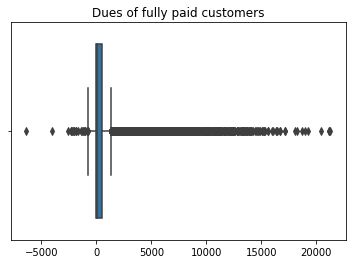


As could be seen from the boxplot many people who has paid less amount are still considered to be fully paid.

It can be assumed that people who even pays 57 $ less than the target amount are fully paid.


In [7]:
req=(df[df.loan_status=='Fully Paid'].to_pay-df[df.loan_status=='Fully Paid'].total_pymnt)
sns.boxplot(req)
plt.title('Dues of fully paid customers')
plt.show()

print('\nAs could be seen from the boxplot many people who has paid less amount are still considered to be fully paid.\n')
print('It can be assumed that people who even pays',round(req.median()),'$ less than the target amount are fully paid.')
med=round(req.median())

In [8]:
# Sanity check :-
# There are plenty of applicants who almost have no dues but are still marked as 'Charged Off'
df[(df.loan_status=='Charged Off') & (df.due<=med)].head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,annual_inc,addr_state,total_pymnt,home_ownership,issue_d,dti,grade,to_pay,principle_due,due
1329,1052469,1284000,20000,Charged Off,20000,36,17.27%,715.75,715.75,Jul-15,50000.0,CA,26149.35,MORTGAGE,Dec-11,3.02,D,25767.00,-6149.35,-382.35
2673,1016253,1243955,2400,Charged Off,2400,36,12.69%,80.51,80.51,Nov-14,48000.0,TX,2842.15,OWN,Nov-11,15.28,B,2898.36,-442.15,56.21
8307,867780,1081409,4500,Charged Off,4500,36,8.49%,142.04,142.04,Dec-13,60000.0,NY,5127.74,RENT,Aug-11,14.98,A,5113.44,-627.74,-14.30
12775,792193,996596,7500,Charged Off,7500,36,15.62%,262.28,264.39,Nov-13,56000.0,AL,9395.43,MORTGAGE,Jun-11,17.19,D,9442.08,-1895.43,46.65
14724,761566,962036,13750,Charged Off,13750,60,19.69%,361.93,241.29,Aug-14,35000.0,FL,21748.69,MORTGAGE,May-11,22.01,E,21715.80,-7998.69,-32.89


In [9]:
# # Resolving insanity by altering 'Charged Off' with 'Fully Paid'
df.loan_status.loc[(df.loan_status=='Charged Off') & (df.due<=med)] = 'Fully Paid'
df['due']=df[df.loan_status=='Charged Off'].to_pay-df[df.loan_status=='Charged Off'].total_pymnt
df['principle_due']=df[df.loan_status=='Charged Off'].funded_amnt-df[df.loan_status=='Charged Off'].total_pymnt

df[(df.loan_status=='Charged Off') & (df.due<=med)]

/home/tuhin/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,annual_inc,addr_state,total_pymnt,home_ownership,issue_d,dti,grade,to_pay,principle_due,due


In [10]:
# Formating int_rate column to contain only numbers
df.int_rate=df.int_rate.apply(lambda x: x.replace('%','')).astype('float')

In [11]:
# Splitting and extracting months and dates and forming different columns from 'last_pymnt_d'
df['last_pymnt_m']=df.last_pymnt_d.apply(lambda x: str(x).split('-')[0])
df['last_pymnt_y']=df.last_pymnt_d.apply(lambda x: 2000+int(str(x).split('-')[1]))

# Similarly with 'issue_pymnt_d'
df['issue_m']=df.issue_d.apply(lambda x: str(x).split('-')[0])
df['issue_y']=df.issue_d.apply(lambda x: 2000+int(str(x).split('-')[1]))

df.head(2)

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,...,issue_d,dti,grade,to_pay,principle_due,due,last_pymnt_m,last_pymnt_y,issue_m,issue_y
0,1077501,1296599,5000,Fully Paid,5000,36,10.65,162.87,171.62,Jan-15,...,Dec-11,27.65,B,5863.32,NaN,NaN,Jan,2015,Dec,2011
1,1077430,1314167,2500,Charged Off,2500,60,15.27,59.83,119.66,Apr-13,...,Dec-11,1.00,C,3589.80,1491.29,2581.09,Apr,2013,Dec,2011


In [12]:
# Deriving a column which contains the no. of months taken by each Fully Paid applicant to repay the loan
days=pd.to_datetime(df.last_pymnt_d.apply(lambda x: ('25-'+x)))-pd.to_datetime(df.issue_d.apply(lambda x: ('25-'+x)))
days=days.apply(lambda x: str(x).split()[0]).astype('int')
df['months_of_pymnt']=round(days/30)

In [13]:
# Changing the column entries to lower case
df['home_ownership']=df.home_ownership.apply(lambda x: str(x).lower())

### The NONE field in home_ownership have only 3 entries, who have a very good credential. Assuming them not to be home-less, their home_ownership is changed to 'Other' for convenience.

In [14]:
df.home_ownership.loc[df.home_ownership=='none'] = 'other'
df.home_ownership.value_counts()

/home/tuhin/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


rent        18847
mortgage    17645
own          3053
other         101
Name: home_ownership, dtype: int64

In [15]:
# Renaming the column
df.rename(columns={'home_ownership':'house'}, inplace=True)

In [16]:
# Binning the funded amounts using quantiles in 4 categories
df['funded_amnt_bkt']=pd.qcut(df.funded_amnt, [0,0.25,0.5,0.75,1], labels=['Low Funded Amount', 'Moderate Funded Amount', 'High Funded Amount', 'Very High Funded Amount'])

In [17]:
# A function to view the ranges formed during binning in pd.qcut
def unquantile(df,quantiles,labels):
    try:
        quantiledvalues = np.quantile(df, quantiles)
        i = 0
        while i < len(quantiledvalues):
            for y in labels:        
                print(round(quantiledvalues[i]),'to',round(quantiledvalues[i+1]),'----->',y)
                i += 1
    except Exception:
        pass

In [18]:
# The ranges of categories of funding amounts
unquantile(df.funded_amnt, [0,0.25,0.5,0.75,1], labels=['Low Funded Amount', 'Moderate Funded Amount', 'High Funded Amount', 'Very High Funded Amount'])

500 to 5400 -----> Low Funded Amount
5400 to 9600 -----> Moderate Funded Amount
9600 to 15000 -----> High Funded Amount
15000 to 35000 -----> Very High Funded Amount


In [19]:
# Binning interest rates into categories
df['int_rate_bkt']=pd.qcut(df.int_rate, [0,0.25,0.5,0.75,1], labels=['Low Interest Rate','Moderate Interest Rate','High Interest Rate','Very High Interest Rate'])

In [20]:
unquantile(df.int_rate, [0,0.25,0.5,0.75,1], labels=['Low Interest Rate','Moderate Interest Rate','High Interest Rate','Very High Interest Rate'])

5 to 9 -----> Low Interest Rate
9 to 12 -----> Moderate Interest Rate
12 to 15 -----> High Interest Rate
15 to 25 -----> Very High Interest Rate


In [21]:
# Binning annual income into categories
df['annual_inc_bkt']=pd.qcut(df.annual_inc, [0,0.25,0.5,0.75,1], labels=['Low Annual Income','Moderate Annual Income','High Annual Income','Very High Annual Income'])

In [22]:
unquantile(df.annual_inc, [0,0.25,0.5,0.75,1], labels=['Low Annual Income','Moderate Annual Income','High Annual Income','Very High Annual Income'])

4000 to 40500 -----> Low Annual Income
40500 to 59000 -----> Moderate Annual Income
59000 to 82416 -----> High Annual Income
82416 to 6000000 -----> Very High Annual Income


In [23]:
# Creting a copy of 'df' data frame which will be used later
test = df.copy()

## <font color='blue'><u>Data Analysis<br>

## 1> <font color='blue'><u>Funded amount Analysis

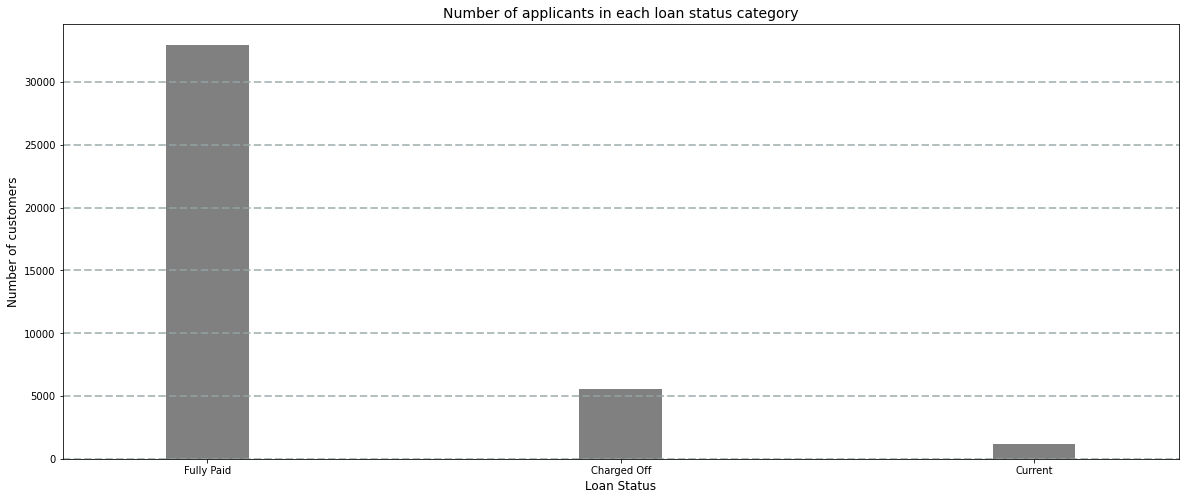

In [24]:
# Plot for Number of applicants in each loan status category
df.loan_status.value_counts().plot.bar(figsize=[20,8], color='grey', width=0.2)
plt.title('Number of applicants in each loan status category', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

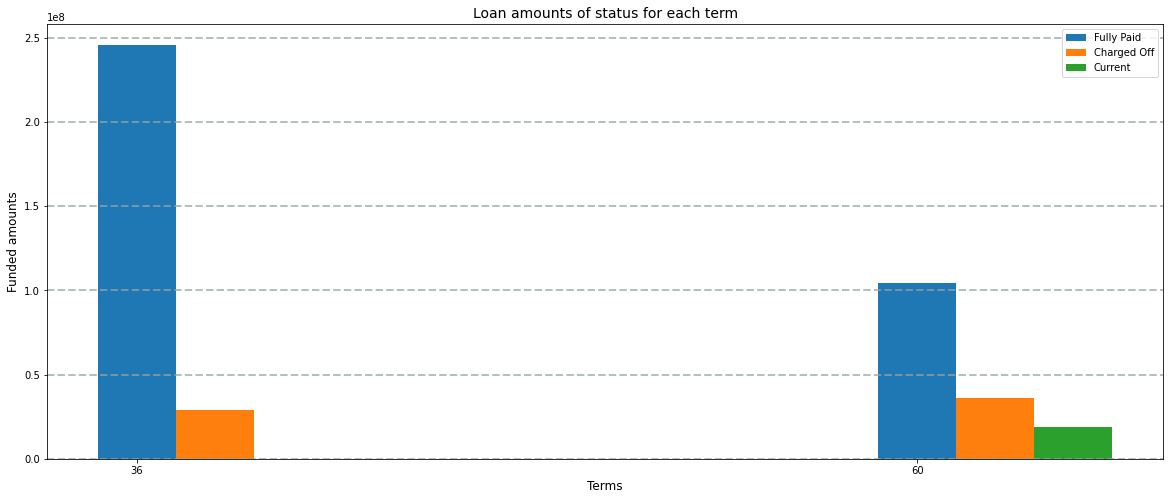

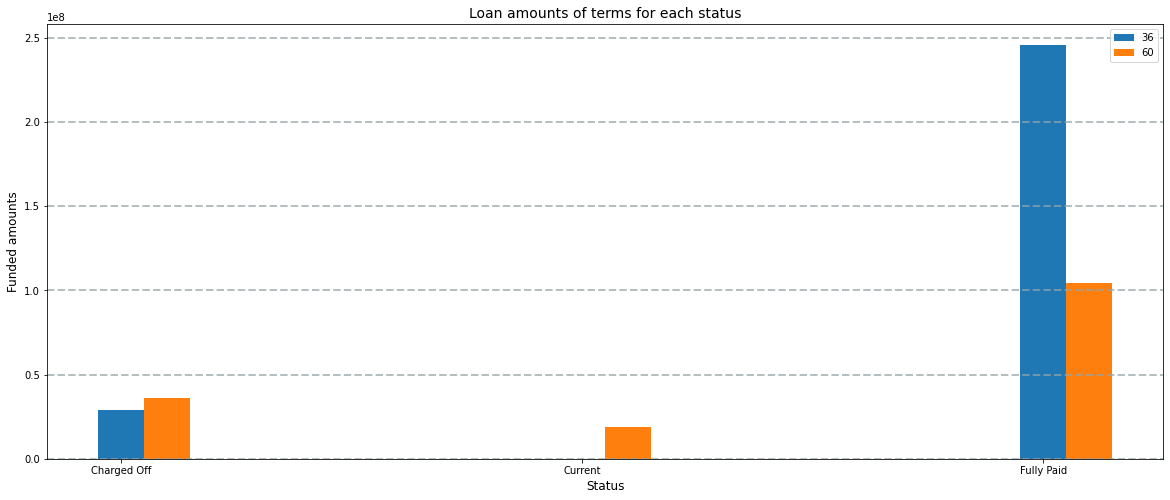

In [25]:
# Plot for Loan amounts of status for each term :-
status=list(df.loan_status.value_counts().index)

df1=df[df.loan_status==df.loan_status.value_counts().index[0]]
df2=df[df.loan_status==df.loan_status.value_counts().index[1]]
df3=df[df.loan_status==df.loan_status.value_counts().index[2]]

n=0.1
bar1= np.arange(len(df.term.value_counts().index))
bar2=[i+n for i in bar1]
bar3=[i+n for i in bar2]

plt.figure(figsize=(20,8))

plt.bar(bar1, list(df1.groupby('term').funded_amnt.sum()), n,label=status[0])

plt.bar(bar2, list(df2.groupby('term').funded_amnt.sum()), n,label=status[1])

soc=df3.groupby('term').funded_amnt.sum()
ls=[0,int(soc)]
plt.bar(bar3, ls, n,label=status[2])
  
plt.xticks(bar1, df.term.value_counts().index)
plt.xlabel('Terms', fontsize=12)
plt.ylabel('Funded amounts', fontsize=12)
plt.title('Loan amounts of status for each term', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()




# Plot for Loan amounts of terms for each status :-
terms=df.term.value_counts().index

df4=df[df.term == df.term.value_counts().index[0]]
df5=df[df.term == df.term.value_counts().index[1]]

n=0.1
bar1= np.arange(len(df.loan_status.value_counts().index))
bar2=[i+n for i in bar1]

plt.figure(figsize=(20,8))

ls=[df4.groupby('loan_status').funded_amnt.sum()[0],0,df4.groupby('loan_status').funded_amnt.sum()[1]]
plt.bar(bar1, ls, n,label=terms[0])

plt.bar(bar2, list(df5.groupby('loan_status').funded_amnt.sum()), n,label=terms[1])
  
plt.xticks(bar1, df.loan_status.value_counts().sort_index().index)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Funded amounts', fontsize=12)
plt.title('Loan amounts of terms for each status', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()

### 1.1> <font color='green'><b>No 36 months policies are currently being sanctioned.

In [26]:
# Making the data frame to contain only 'Fully Paid' & 'Charged Off' loan status
df=df[df.loan_status.isin(['Fully Paid','Charged Off'])]

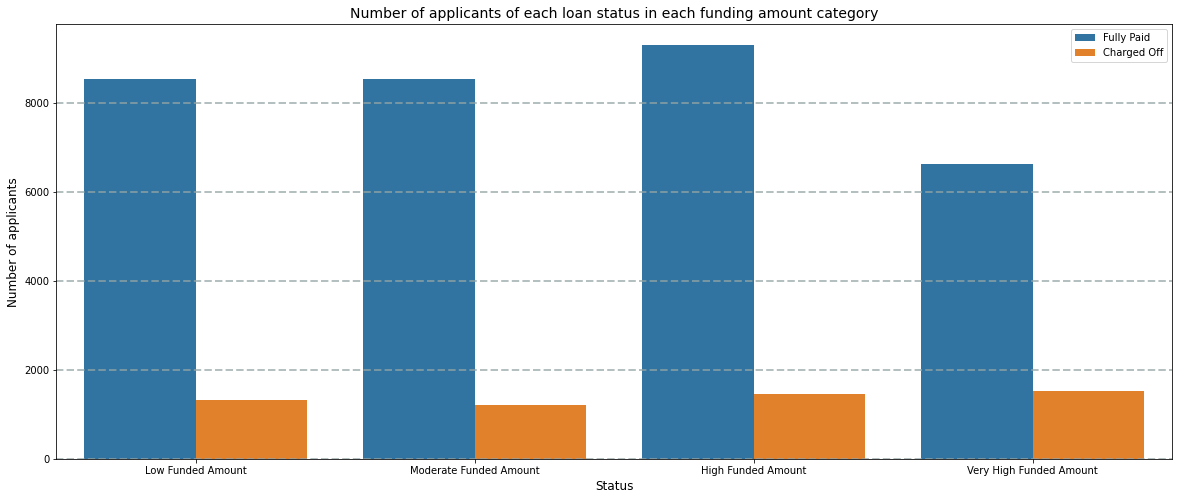

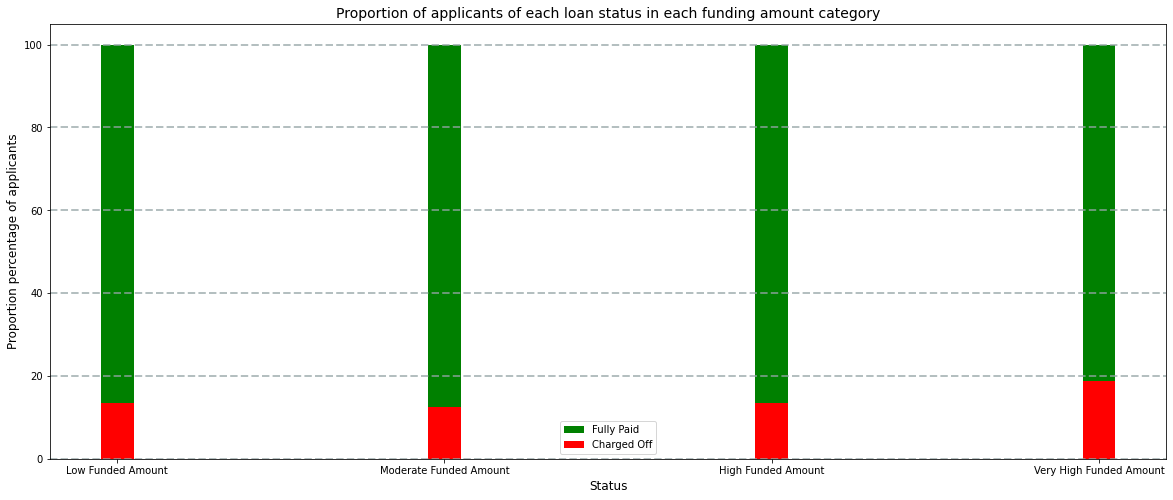

In [27]:
# Plot for Number of applicants of each loan status in each funding amount category :-
plt.figure(figsize=(20,8))
sns.countplot(x='funded_amnt_bkt', hue='loan_status', data=df)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of applicants', fontsize=12)
plt.title('Number of applicants of each loan status in each funding amount category', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()



# Plot for percentage of applicants of each loan status in each funding amount category :-
n=0.1
bar1= np.arange(len(df.funded_amnt_bkt.value_counts().sort_index().index))

plt.figure(figsize=(20,8))
nn=df[df.loan_status==df.loan_status.value_counts().index[0]].funded_amnt_bkt.value_counts().sort_index()
mm=df[df.loan_status==df.loan_status.value_counts().index[1]].funded_amnt_bkt.value_counts().sort_index()

plt.bar(bar1, np.array((nn/(mm+nn))*100) + np.array((mm/(mm+nn))*100), n,label=df.loan_status.value_counts().index[0], color='g')
plt.bar(bar1, np.array((mm/(mm+nn))*100), n,label=df.loan_status.value_counts().index[1], color='r')
  
plt.xticks(bar1, df.funded_amnt_bkt.value_counts().sort_index().index)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Proportion percentage of applicants', fontsize=12)
plt.title('Proportion of applicants of each loan status in each funding amount category', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()

### 1.2> <font color='green'><b>Around 20% of Very High Loan receivers tend to be defaulter.

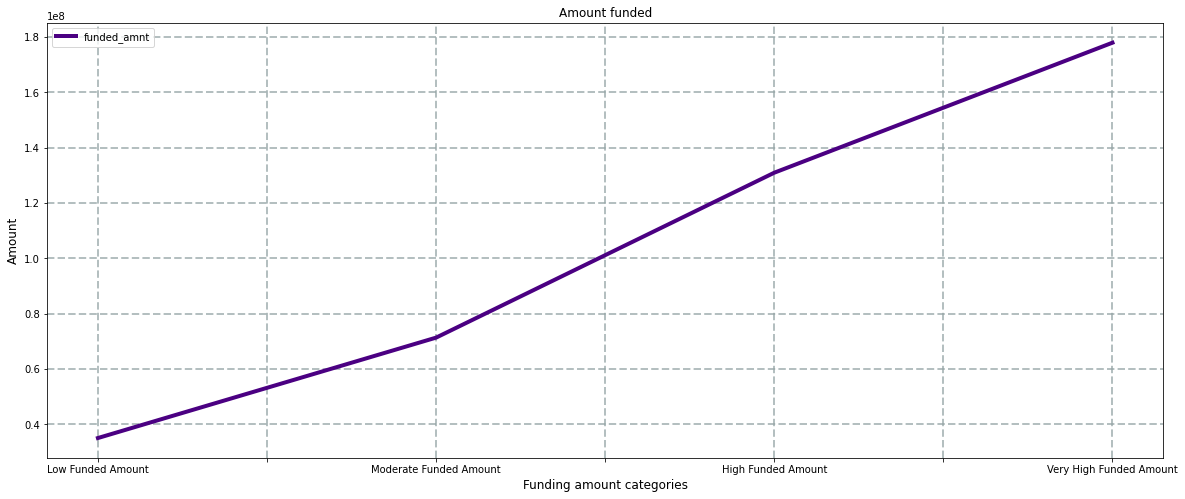

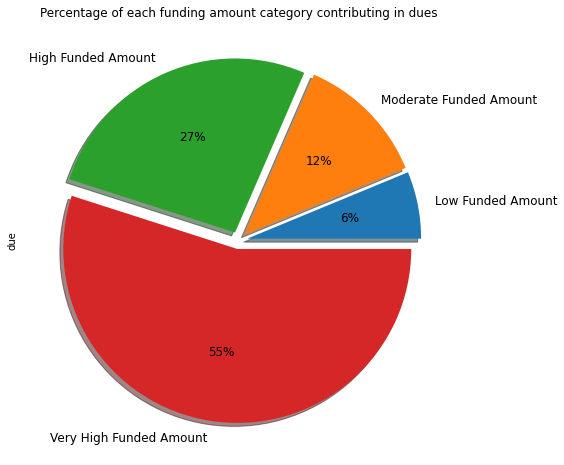

In [28]:
# Plot for Amount being funded Vs. Due
df.groupby('funded_amnt_bkt').funded_amnt.sum().plot(figsize=[20,8], color='#4b0082', linewidth=4)
plt.title('Amount funded')
plt.xticks(rotation = 0)
plt.xlabel('Funding amount categories', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.show()

print('\n\n\n')
# Plot for Percentage of each funding amount category contributing in dues
((df[df.loan_status=='Charged Off'].groupby('funded_amnt_bkt').due.sum()/df[df.loan_status=='Charged Off'].due.sum())*100).plot(kind='pie', figsize=[8,8], autopct="%.0f%%", fontsize=12, explode=[0.05]*4, shadow=True)
plt.title('Percentage of each funding amount category contributing in dues')
plt.show()

### 1.3> <font color='green'><b>Of the total amount of loss, 55 % is contributed by Very High funding amount category since total fundings in the very high funded amount is maximum

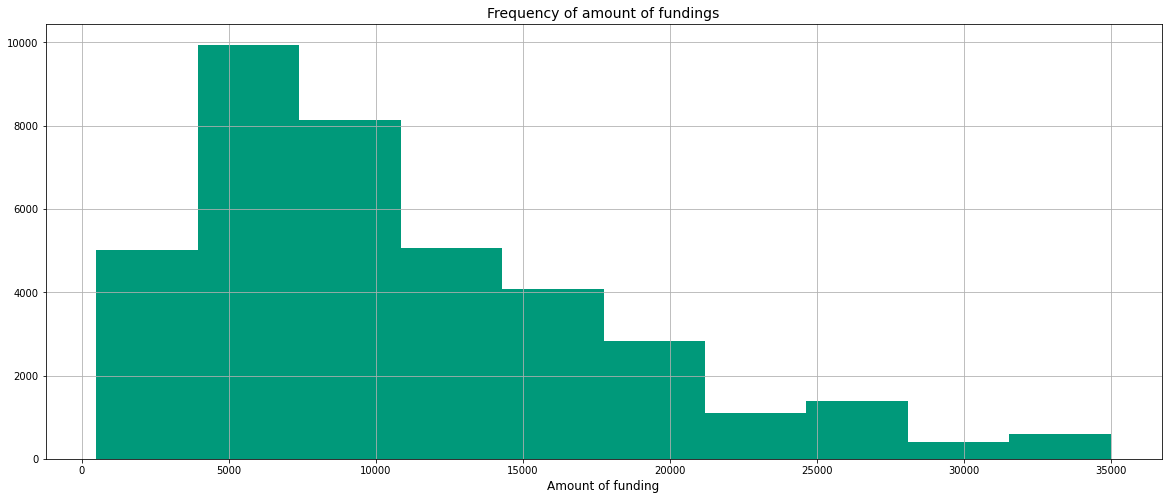

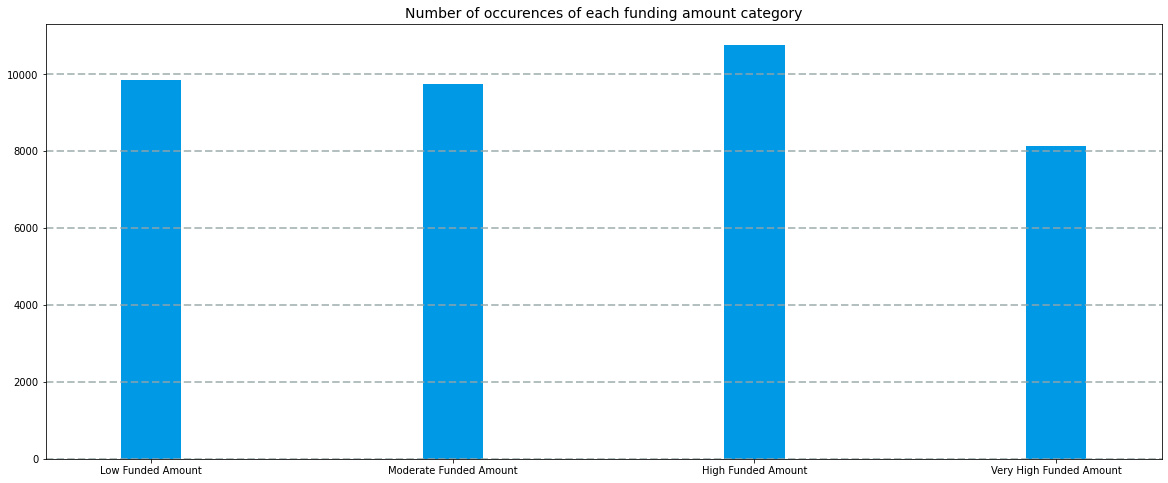

In [29]:
df.funded_amnt.hist(bins=10,figsize=[20,8],color='#00997a')
plt.title('Frequency of amount of fundings', fontsize=14)
plt.xlabel('Amount of funding', fontsize=12)
plt.show()

print('\n\n\n')
df.funded_amnt_bkt.value_counts().sort_index().plot.bar(figsize=[20,8],width=0.2,color='#0099e6')
plt.xticks(rotation=0)
plt.title('Number of occurences of each funding amount category', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 1.4><font color='green'><b> From the above 2 graphs, it can be said that Very high funded amounts are least in count but maximum in amount

### Therefore our focus of interest should be Very High Loan amounts, and to minimise the loss

In [30]:
# Making a copy of the data frame
copy = df.copy()
# Making the data frame to contain 'Very High Funded Amount' funding amount category
copy = df[df.funded_amnt_bkt=='Very High Funded Amount'].drop('funded_amnt_bkt', axis=1)
copy.head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,...,to_pay,principle_due,due,last_pymnt_m,last_pymnt_y,issue_m,issue_y,months_of_pymnt,int_rate_bkt,annual_inc_bkt
20,1069740,1284848,20250,Fully Paid,20250,60,15.27,484.63,6024.09,Aug-15,...,29077.80,NaN,NaN,Aug,2015,Dec,2011,45.0,Very High Interest Rate,Moderate Annual Income
21,1039153,1269083,21000,Charged Off,21000,36,12.42,701.73,701.73,Sep-13,...,25262.28,6974.60,11236.88,Sep,2013,Dec,2011,21.0,High Interest Rate,Very High Annual Income
31,1069539,1304608,31825,Fully Paid,31825,36,7.90,995.82,16966.70,Aug-13,...,35849.52,NaN,NaN,Aug,2013,Dec,2011,20.0,Low Interest Rate,High Annual Income
51,1068120,1302485,25600,Fully Paid,25600,36,9.91,824.96,838.27,Jan-15,...,29698.56,NaN,NaN,Jan,2015,Dec,2011,38.0,Moderate Interest Rate,Very High Annual Income
55,1069410,1303652,21000,Charged Off,21000,60,19.91,555.33,555.33,Oct-14,...,33319.80,2680.86,15000.66,Oct,2014,Dec,2011,34.0,Very High Interest Rate,Moderate Annual Income


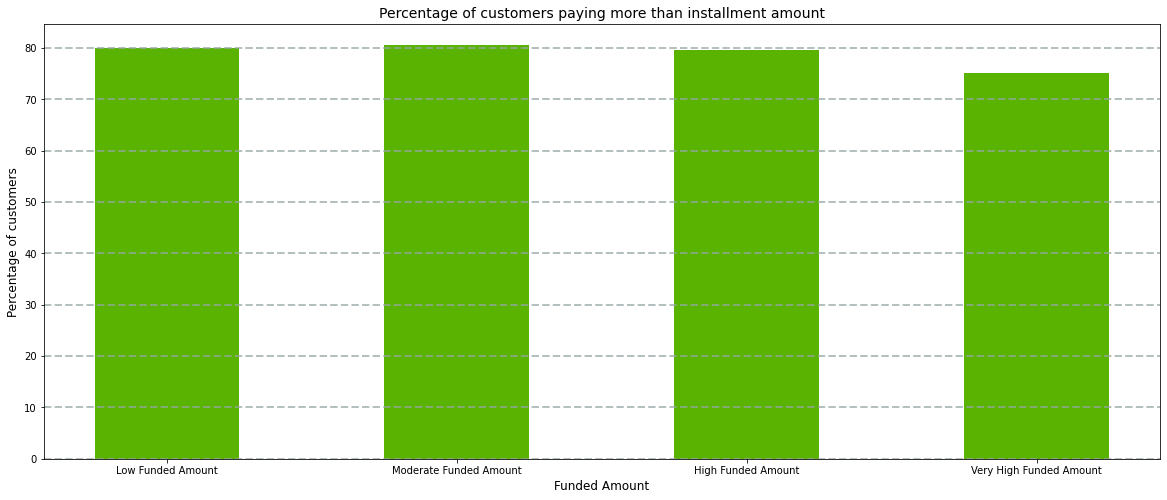

Percentage of low funded customers paying more than the installment amount is 80.1 %
Percentage of moderately funded customers paying more than the installment amount is 80.68 %
Percentage of highly funded customers paying more than the installment amount is 79.58 %
Percentage of very highly funded customers paying more than the installment amount is 75.21 %


In [31]:
#Plot for Percentage of customers paying more than installment amount (values in 'installment')
VHigh=round((len(copy[copy.last_pymnt_amnt>copy.installment])/len(copy))*100, 2)

dfLow=df[df.funded_amnt_bkt=='Low Funded Amount']
Low=round((len(dfLow[dfLow.last_pymnt_amnt>dfLow.installment])/len(dfLow))*100, 2)

dfModerate=df[df.funded_amnt_bkt=='Moderate Funded Amount']
Moderate=round((len(dfModerate[dfModerate.last_pymnt_amnt>dfModerate.installment])/len(dfModerate))*100, 2)

dfHigh=df[df.funded_amnt_bkt=='High Funded Amount']
High=round((len(dfHigh[dfHigh.last_pymnt_amnt>dfHigh.installment])/len(dfHigh))*100, 2)



plt.figure(figsize=(20,8))
plt.bar(np.arange(4),[Low,Moderate,High,VHigh],0.5,color='#59b300')

plt.xticks(np.arange(4), ['Low Funded Amount', 'Moderate Funded Amount', 'High Funded Amount', 'Very High Funded Amount'])
plt.xlabel('Funded Amount', fontsize=12)
plt.ylabel('Percentage of customers', fontsize=12)
plt.title('Percentage of customers paying more than installment amount', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()




print('Percentage of low funded customers paying more than the installment amount is',Low,'%')
print('Percentage of moderately funded customers paying more than the installment amount is',Moderate,'%')
print('Percentage of highly funded customers paying more than the installment amount is',High,'%')
print('Percentage of very highly funded customers paying more than the installment amount is',VHigh,'%')

### 1.5><font color='green'><b> From the above observation, it is clear that around 80% low, moderate and highly funded customers tend to pay more payments than the installment amount but around 75% very highly funded customers can pay more, which is 5 percent less. The reason is discussed below:

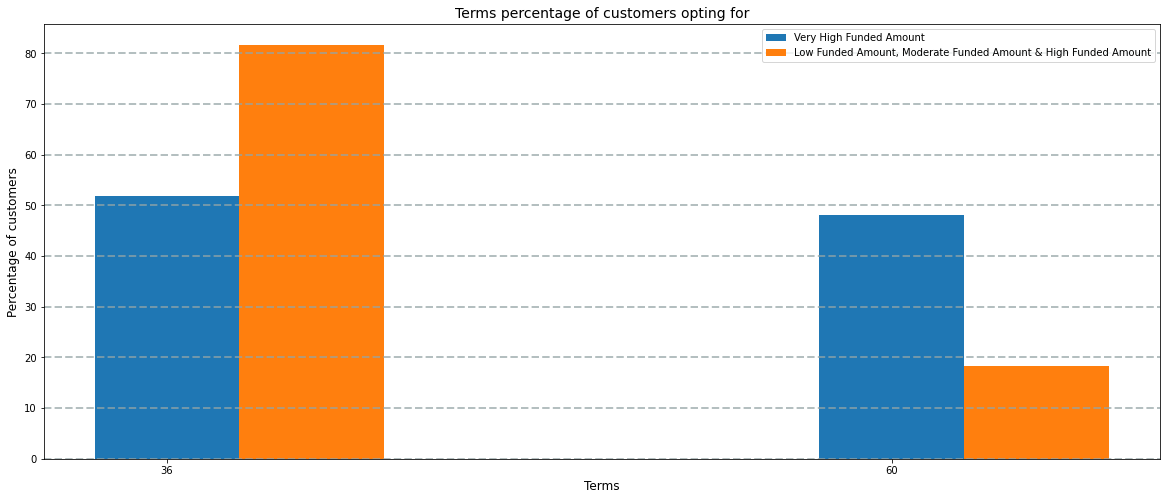

In [32]:
# Plot for Terms percentage of customers opting for
n=0.2
bar1= np.arange(2)
bar2=[i+n for i in bar1]

plt.figure(figsize=[20,8])
plt.bar(bar1,round((copy.term.value_counts()/copy.term.value_counts().sum())*100,2),n,label='Very High Funded Amount')
plt.bar(bar2,round((df[df.funded_amnt_bkt.isin(['Low Funded Amount', 'Moderate Funded Amount', 'High Funded Amount'])].term.value_counts()/df[df.funded_amnt_bkt.isin(['Low Funded Amount', 'Moderate Funded Amount', 'High Funded Amount'])].term.value_counts().sum())*100,2),n,label='Low Funded Amount, Moderate Funded Amount & High Funded Amount')

plt.xticks(bar1, copy.term.value_counts().index)
plt.xlabel('Terms', fontsize=12)
plt.ylabel('Percentage of customers', fontsize=12)
plt.title('Terms percentage of customers opting for', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()

### 1.5.1> <font color='bottlegreen'><b>From the above observation, it is clear that customers with very high funding amounts go for a plan of 60 months than the customers with lower amount of funding.

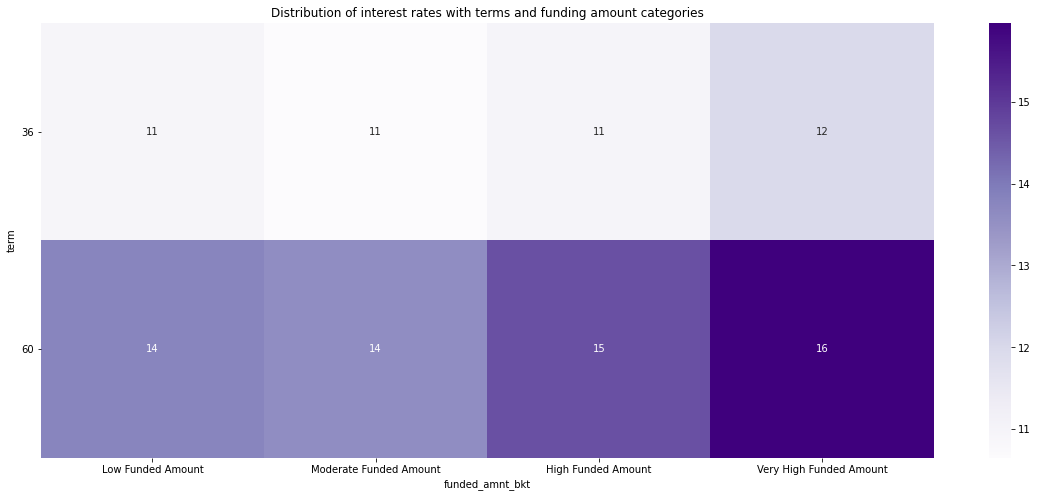

In [33]:
# Plot for Distribution of interest rates with terms and funding amount categories
piv=pd.pivot_table(df, index='term', columns='funded_amnt_bkt', values='int_rate', aggfunc=np.median)
plt.figure(figsize=(20,8))
sns.heatmap(piv, cmap='Purples', annot=True)
plt.yticks(rotation = 0)
plt.title('Distribution of interest rates with terms and funding amount categories')
plt.show()

### 1.5.2> <font color='bottlegreen'><b>Since the interest amount for 60 months term and very high funded amount is comparatively higher than other amounts' and term plans' interest rate, customers can not pay more than the fixed installment amount and finally may end up being charged off.

## 2> <font color='blue'><u>Annual Income Analysis

Total annual income outliers :-


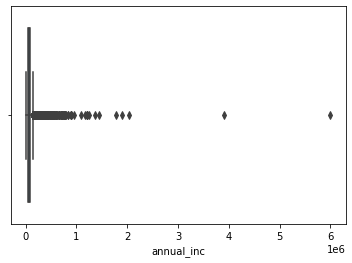

Upper fence set at = 145000.0 

After removal of extreme outliers :-
count    3.850600e+04
mean     6.882021e+04
std      6.426059e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


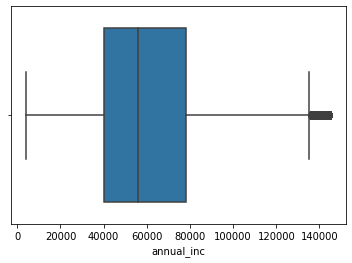

In [34]:
# The following funtion is to calculate the upper and lower fence in box plot
#    Upper fence = Q3 + (1.5 * IQR)
#    Lower fence = Q1 — (1.5 * IQR).
def outlier(df):
    uq=df.describe().iloc[-2,0] #75%
    lq=df.describe().iloc[-4,0] #25%
    iqr=1.5*(uq-lq)             #IQR
    upperfence=uq+iqr
    lowerfence=lq-iqr
    return [upperfence, lowerfence]



print('Total annual income outliers :-')
sns.boxplot(df.annual_inc)
plt.show()

print('Upper fence set at =', outlier(pd.DataFrame(df.annual_inc))[0],'\n')
print('After removal of extreme outliers :-')
print(df.annual_inc.describe())
sns.boxplot(df.annual_inc[df.annual_inc<=outlier(pd.DataFrame(df.annual_inc))[0]])
plt.show()
  

In [35]:
# Removing outliers
df=df[df.annual_inc<=outlier(pd.DataFrame(df.annual_inc))[0]]

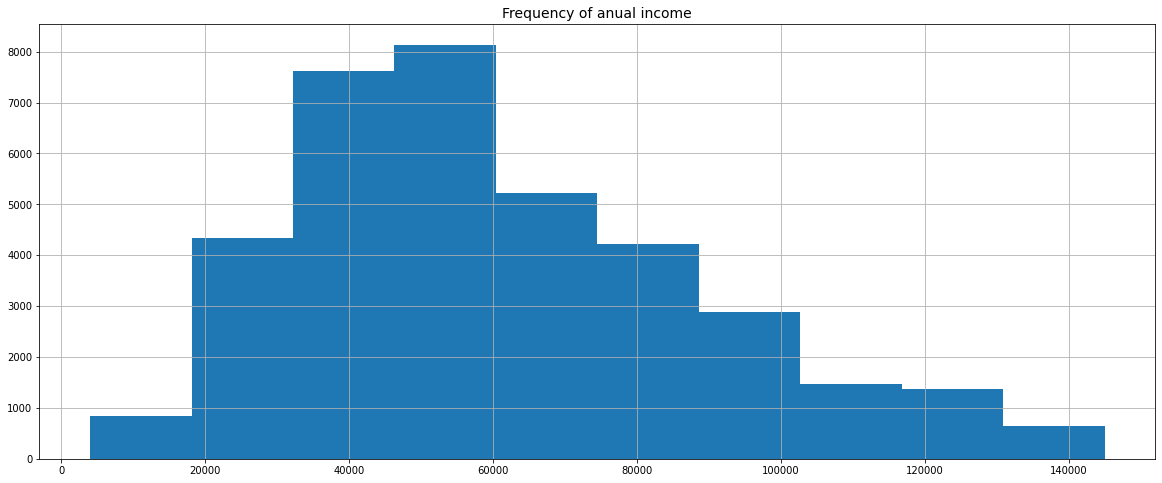

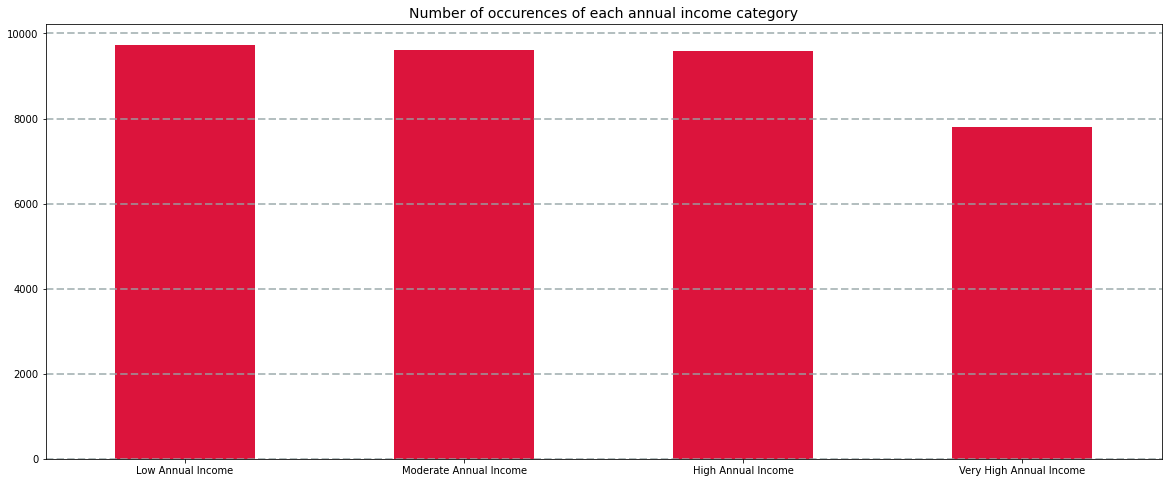

In [36]:
df.annual_inc.hist(bins=10, figsize=[20,8])
plt.title('Frequency of anual income', fontsize=14)
plt.show()

print('\n\n\n')
df.annual_inc_bkt.value_counts().plot.bar(figsize=[20,8], color='crimson')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Number of occurences of each annual income category', fontsize=14)
plt.xticks(rotation=0)
plt.show()

### 2.1> <font color='green'><b>Seeing at the combined two plots above, it is clear that no particular income group prominently dominates in count.

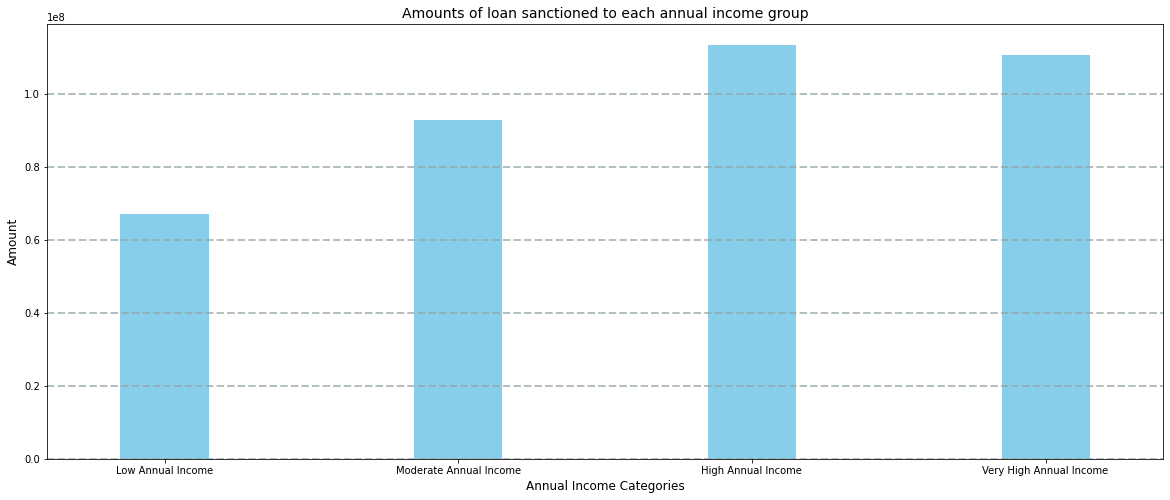

In [37]:
# Plot for Amounts of loan sanctioned to each annual income group
df.groupby('annual_inc_bkt').funded_amnt.sum().plot.bar(figsize=[20,8], width=0.3, color='skyblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=0)
plt.xlabel('Annual Income Categories',fontsize=12)
plt.ylabel('Amount',fontsize=12)
plt.title('Amounts of loan sanctioned to each annual income group', fontsize=14)
plt.show()

### 2.2> <font color='green'><b>Higher annual income groups definitely received larger amounts. The following scatter plot exhibits the same:
### One reason is they are seemingly more capable of repaying the loan

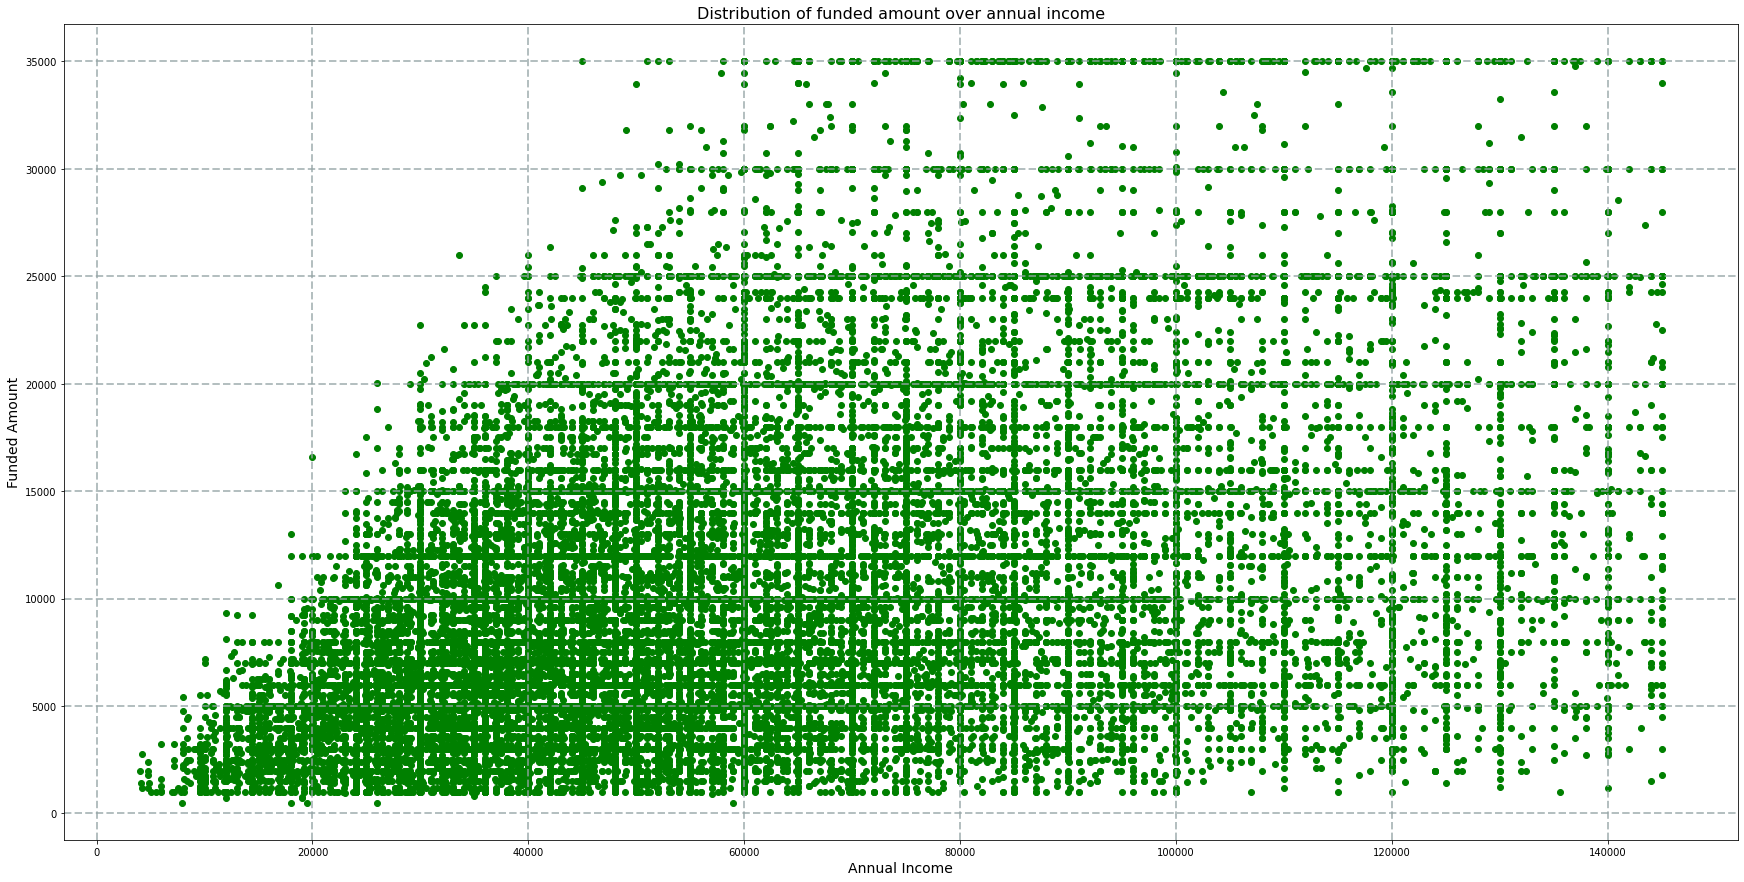

In [38]:
plt.figure(figsize=[30,15])
plt.scatter(df.annual_inc,df.funded_amnt, color='g')
plt.title('Distribution of funded amount over annual income', fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.xlabel('Annual Income',fontsize=14)
plt.ylabel('Funded Amount',fontsize=14)
plt.show()

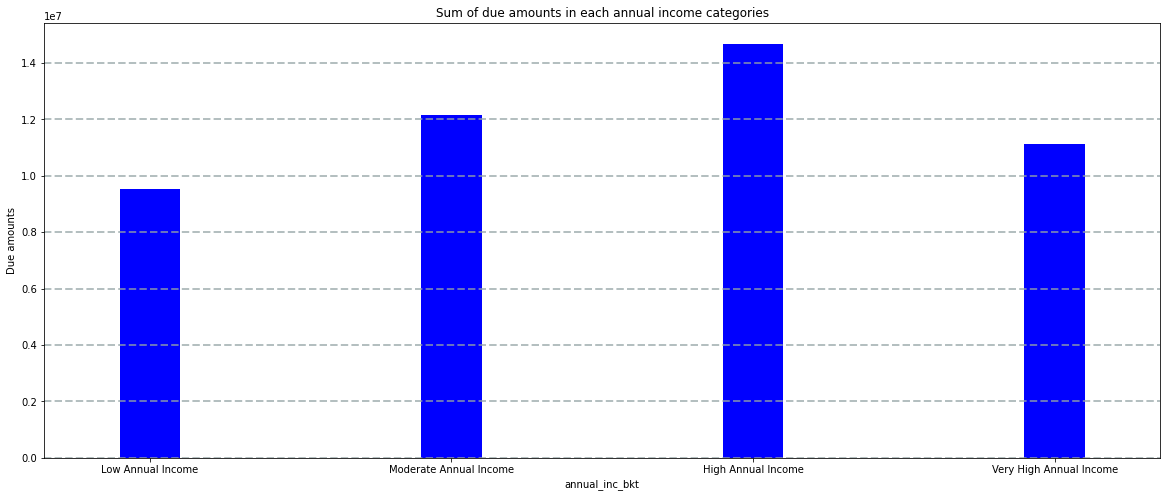

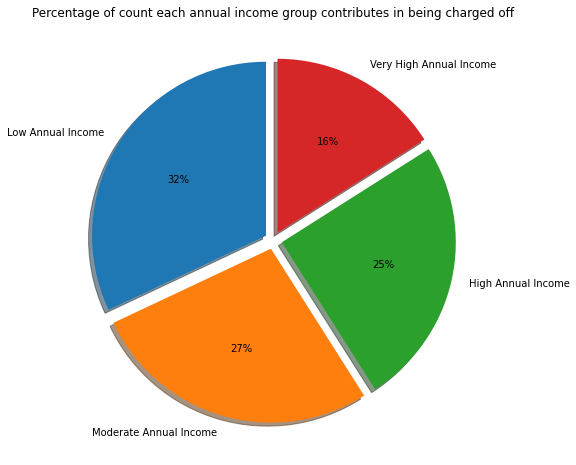

In [39]:
# Plot for Sum of due amounts in each annual income categories
plt.figure(figsize=[20,8])
df.groupby('annual_inc_bkt').due.sum().plot.bar(width=0.2, color='b')
plt.ylabel('Due amounts')
plt.xticks(rotation=0)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Sum of due amounts in each annual income categories')
plt.show()



print('\n\n')

# Plot for Percentage of count each annual income group contributes in being charged off
sizes=list(map(lambda x: round(x), (((df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').loan_status.value_counts()/df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').loan_status.value_counts().sum())*100).values)))
labels=[n[0] for n in list(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').loan_status.value_counts().index)]
plt.figure(figsize=[8,8])
plt.pie(sizes, labels=labels, explode=[0.05]*4, autopct="%.0f%%", shadow=True, startangle=90)
plt.title("Percentage of count each annual income group contributes in being charged off")
plt.show()

### 2.3><font color='green'><b> High annual income group applicants are less likely to be defaulter but have caused substantial financial loss

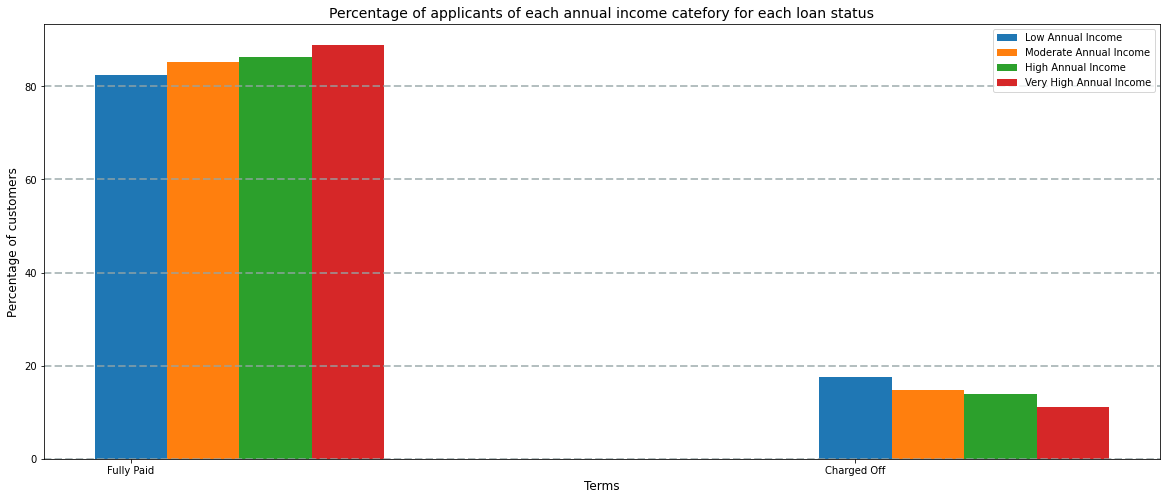

82.37 % of Low annual income customers tend to fully pay their loan whereas 17.63 % of customers tend to be charged off.
85.21 % of Moderate annual income customers tend to fully pay their loan whereas 14.79 % of customers tend to be charged off.
86.19 % of High annual income customers tend to fully pay their loan whereas 13.81 % of customers tend to be charged off.
88.95 % of Very high annual income customers tend to fully pay their loan whereas 11.05 % of customers tend to be charged off.


In [40]:
# Plot for Percentage of applicants of each annual income catefory for each loan status

li=round((df.groupby('annual_inc_bkt').loan_status.value_counts()['Low Annual Income']/df.groupby('annual_inc_bkt').loan_status.value_counts()['Low Annual Income'].sum())*100,2)
mi=round((df.groupby('annual_inc_bkt').loan_status.value_counts()['Moderate Annual Income']/df.groupby('annual_inc_bkt').loan_status.value_counts()['Moderate Annual Income'].sum())*100,2)
hi=round((df.groupby('annual_inc_bkt').loan_status.value_counts()['High Annual Income']/df.groupby('annual_inc_bkt').loan_status.value_counts()['High Annual Income'].sum())*100,2)
vi=round((df.groupby('annual_inc_bkt').loan_status.value_counts()['Very High Annual Income']/df.groupby('annual_inc_bkt').loan_status.value_counts()['Very High Annual Income'].sum())*100,2)



n=0.1
bar1= np.arange(2)
bar2=[i+n for i in bar1]
bar3=[i+n for i in bar2]
bar4=[i+n for i in bar3]

plt.figure(figsize=[20,8])
plt.bar(bar1, li, n, label='Low Annual Income')
plt.bar(bar2, mi, n, label='Moderate Annual Income')
plt.bar(bar3, hi, n, label='High Annual Income')
plt.bar(bar4, vi, n, label='Very High Annual Income')

plt.xticks(bar1, df.loan_status.value_counts().index)
plt.xlabel('Terms', fontsize=12)
plt.ylabel('Percentage of customers', fontsize=12)
plt.title('Percentage of applicants of each annual income catefory for each loan status', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()


print(li[0],'% of Low annual income customers tend to fully pay their loan whereas',li[1],'% of customers tend to be charged off.')
print(mi[0],'% of Moderate annual income customers tend to fully pay their loan whereas',mi[1],'% of customers tend to be charged off.')
print(hi[0],'% of High annual income customers tend to fully pay their loan whereas',hi[1],'% of customers tend to be charged off.')
print(vi[0],'% of Very high annual income customers tend to fully pay their loan whereas',vi[1],'% of customers tend to be charged off.')

## 2.4>
### <font color='green'><b>82.32 % of Low annual income customers tend to fully pay their loan whereas 17.68 % of customers tend to be charged off.
### <font color='green'><b>85.18 % of Moderate annual income customers tend to fully pay their loan whereas 14.82 % of customers tend to be charged off.
### <font color='green'><b>86.02 % of High annual income customers tend to fully pay their loan whereas 13.98 % of customers tend to be charged off.
### <font color='green'><b>88.68 % of Very high annual income customers tend to fully pay their loan whereas 11.32 % of customers tend to be charged off.

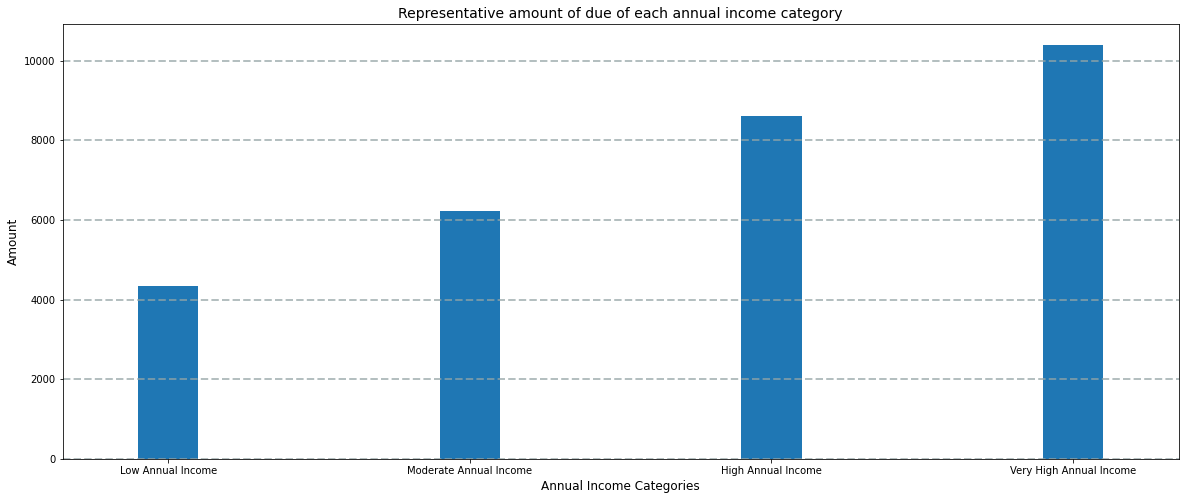

Representative due amount of Low Annual Income is 4331 USD
Representative due amount of Moderate Annual Income is 6211 USD
Representative due amount of High Annual Income is 8606 USD
Representative due amount of Very High Annual Income is 10400 USD


In [41]:
# plot for Representative amount of due of each annual income category

df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median().plot.bar(figsize=[20,8], width=0.2)
plt.xticks(rotation=0)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Representative amount of due of each annual income category', fontsize=14)
plt.ylabel('Amount',fontsize=12)
plt.xlabel('Annual Income Categories',fontsize=12)
plt.show()

print('Representative due amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median().index[0],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median()[0]),'USD')
print('Representative due amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median().index[1],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median()[1]),'USD')
print('Representative due amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median().index[2],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median()[2]),'USD')
print('Representative due amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median().index[3],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').due.median()[3]),'USD')

### 2.5> <font color='green'><b>In case of being a defaulter, a low annual income applicant tends to cause a loss of around 4000 USD, whereas a very high anuual income applicant tends to cause a loss of around 10,000 USD
### 2.6> <font color='green'><b>A Very High annual income applicant causes monetary loss around as twice as a low annual income applicant since their funding amounts are quite high.

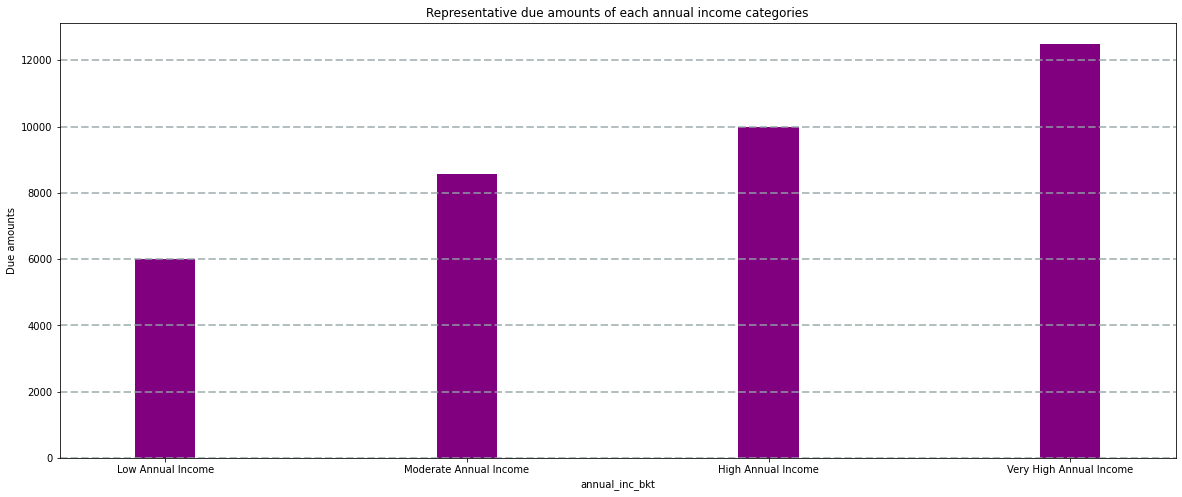

Representative funding amount of Low Annual Income is 6000 USD
Representative funding amount of Moderate Annual Income is 8562 USD
Representative funding amount of High Annual Income is 10000 USD
Representative funding amount of Very High Annual Income is 12500 USD


In [42]:
# Plot for Representative due amounts of each annual income categories
plt.figure(figsize=[20,8])
df.groupby('annual_inc_bkt').funded_amnt.median().plot.bar(width=0.2, color='purple')
plt.ylabel('Due amounts')
plt.title('Representative due amounts of each annual income categories')
plt.xticks(rotation=0)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

print('Representative funding amount of',df.groupby('annual_inc_bkt').funded_amnt.median().index[0],'is',round(df.groupby('annual_inc_bkt').funded_amnt.median()[0]),'USD')
print('Representative funding amount of',df.groupby('annual_inc_bkt').funded_amnt.median().index[1],'is',round(df.groupby('annual_inc_bkt').funded_amnt.median()[1]),'USD')
print('Representative funding amount of',df.groupby('annual_inc_bkt').funded_amnt.median().index[2],'is',round(df.groupby('annual_inc_bkt').funded_amnt.median()[2]),'USD')
print('Representative funding amount of',df.groupby('annual_inc_bkt').funded_amnt.median().index[3],'is',round(df.groupby('annual_inc_bkt').funded_amnt.median()[3]),'USD')

### 2.7> <font color='green'><b>There is distinctive loan providing amount scheme to each groups of income ranging from low to high accordingly but the difference between representetive values of funding amount and due amount is not sufficient.

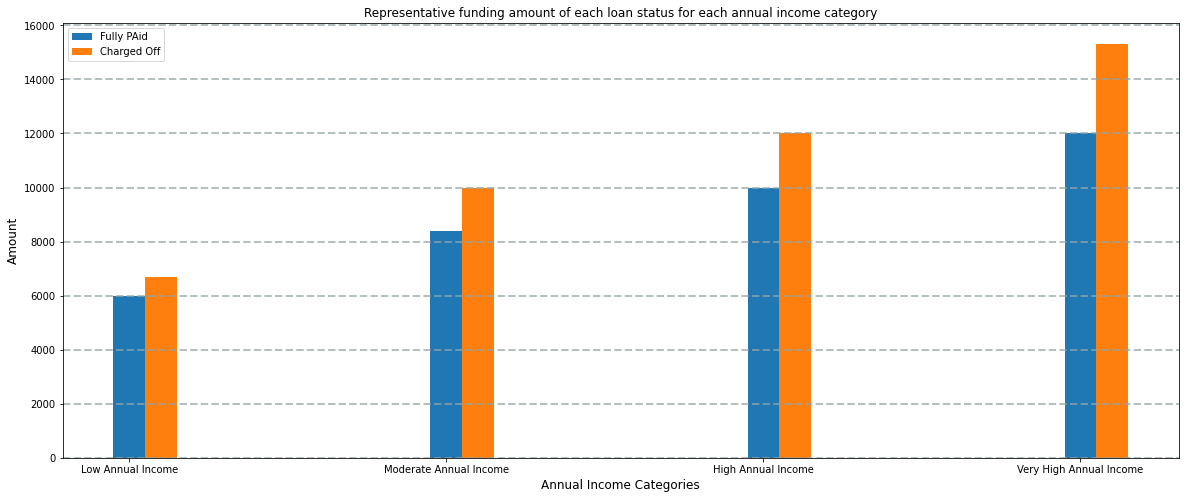




In case of being charged off:-

Representative funding amount of Low Annual Income is 6700 USD
Representative funding amount of Moderate Annual Income is 10000 USD
Representative funding amount of High Annual Income is 12000 USD
Representative funding amount of Very High Annual Income is 15325 USD



In case of being charged off:-

Representative funding amount of Low Annual Income is 6000 USD
Representative funding amount of Moderate Annual Income is 8400 USD
Representative funding amount of High Annual Income is 10000 USD
Representative funding amount of Very High Annual Income is 12000 USD


In [43]:
# Plot for Representative funding amount of each loan status for each annual income category
n=0.1
bar1= np.arange(4)
bar2=[i+n for i in bar1]

plt.figure(figsize=[20,8])

plt.bar(bar1,df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median(),n,label='Fully PAid')
plt.bar(bar2,df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median(),n,label='Charged Off')
plt.xticks(bar1, df.groupby('annual_inc_bkt').funded_amnt.median().index)
plt.legend()
plt.ylabel('Amount',fontsize=12)
plt.xlabel('Annual Income Categories',fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Representative funding amount of each loan status for each annual income category')
plt.show()


print('\n\n\nIn case of being charged off:-\n')
print('Representative funding amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median().index[0],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median()[0]),'USD')
print('Representative funding amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median().index[1],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median()[1]),'USD')
print('Representative funding amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median().index[2],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median()[2]),'USD')
print('Representative funding amount of',df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median().index[3],'is',round(df[df.loan_status=='Charged Off'].groupby('annual_inc_bkt').funded_amnt.median()[3]),'USD')

print('\n\n\nIn case of being charged off:-\n')
print('Representative funding amount of',df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median().index[0],'is',round(df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median()[0]),'USD')
print('Representative funding amount of',df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median().index[1],'is',round(df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median()[1]),'USD')
print('Representative funding amount of',df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median().index[2],'is',round(df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median()[2]),'USD')
print('Representative funding amount of',df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median().index[3],'is',round(df[df.loan_status=='Fully Paid'].groupby('annual_inc_bkt').funded_amnt.median()[3]),'USD')

### 2.8> <font color='green'><b>From the above plot, it can be summarized that for every annual income group, there is difference of loan funding amount which decides the loan status. For Very high annual income group, this difference is significantly huge.

### 2.9> <font color='green'><b>Very high annual income group who receives loan amount of around 12,000 USD with 11.32% rate defaulter with a chance of leaving a due of around 10,000 USD is quite a big issue to deal with.

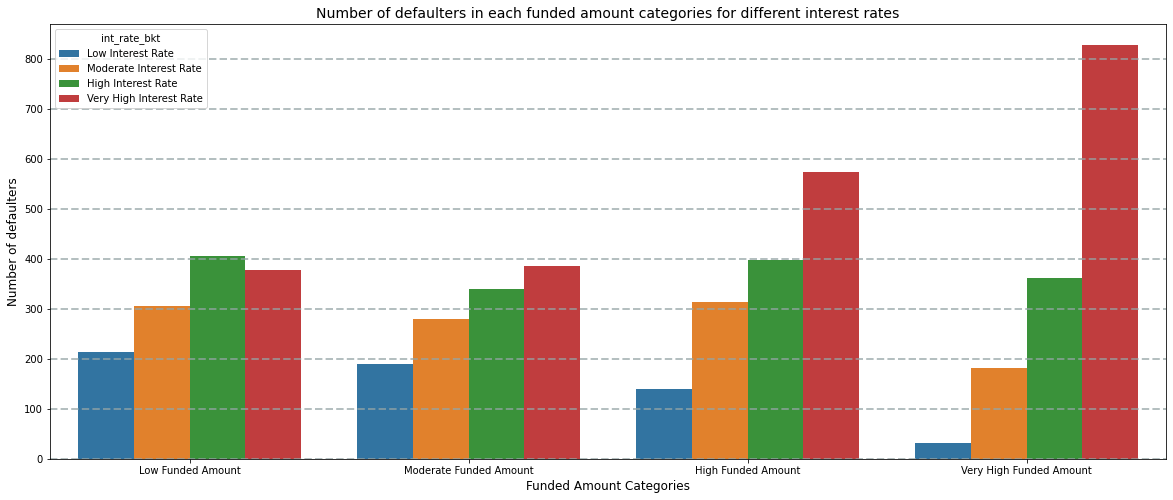

In [44]:
plt.figure(figsize=[20,8])
sns.countplot(x='funded_amnt_bkt', hue='int_rate_bkt', data=df[df.loan_status=='Charged Off'])
plt.xlabel('Funded Amount Categories',fontsize=12)
plt.ylabel('Number of defaulters',fontsize=12)
plt.title('Number of defaulters in each funded amount categories for different interest rates', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### 2.10> <font color='green'><b>There is more chance of being defaulter if interest rate is very high high in high and very high funded amounts.

## 3> <font color='blue'><u>Due Analysis

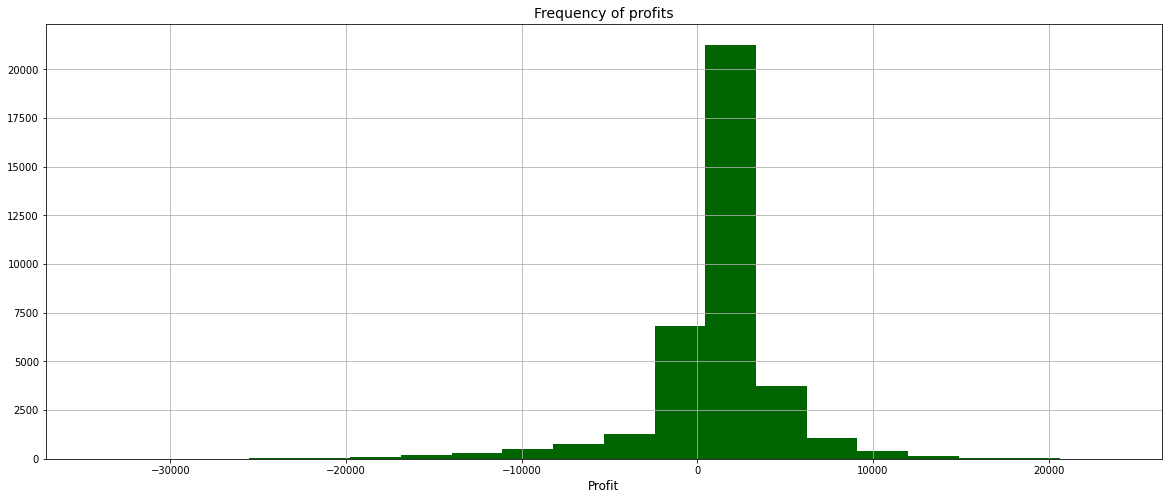

In [45]:
# Plot for frequency of profits
plt.figure(figsize=[20,8])
(df.total_pymnt-df.funded_amnt).hist(bins=20, color='darkgreen')
plt.xlabel('Profit',fontsize=12)
plt.title('Frequency of profits',fontsize=14)
plt.show()

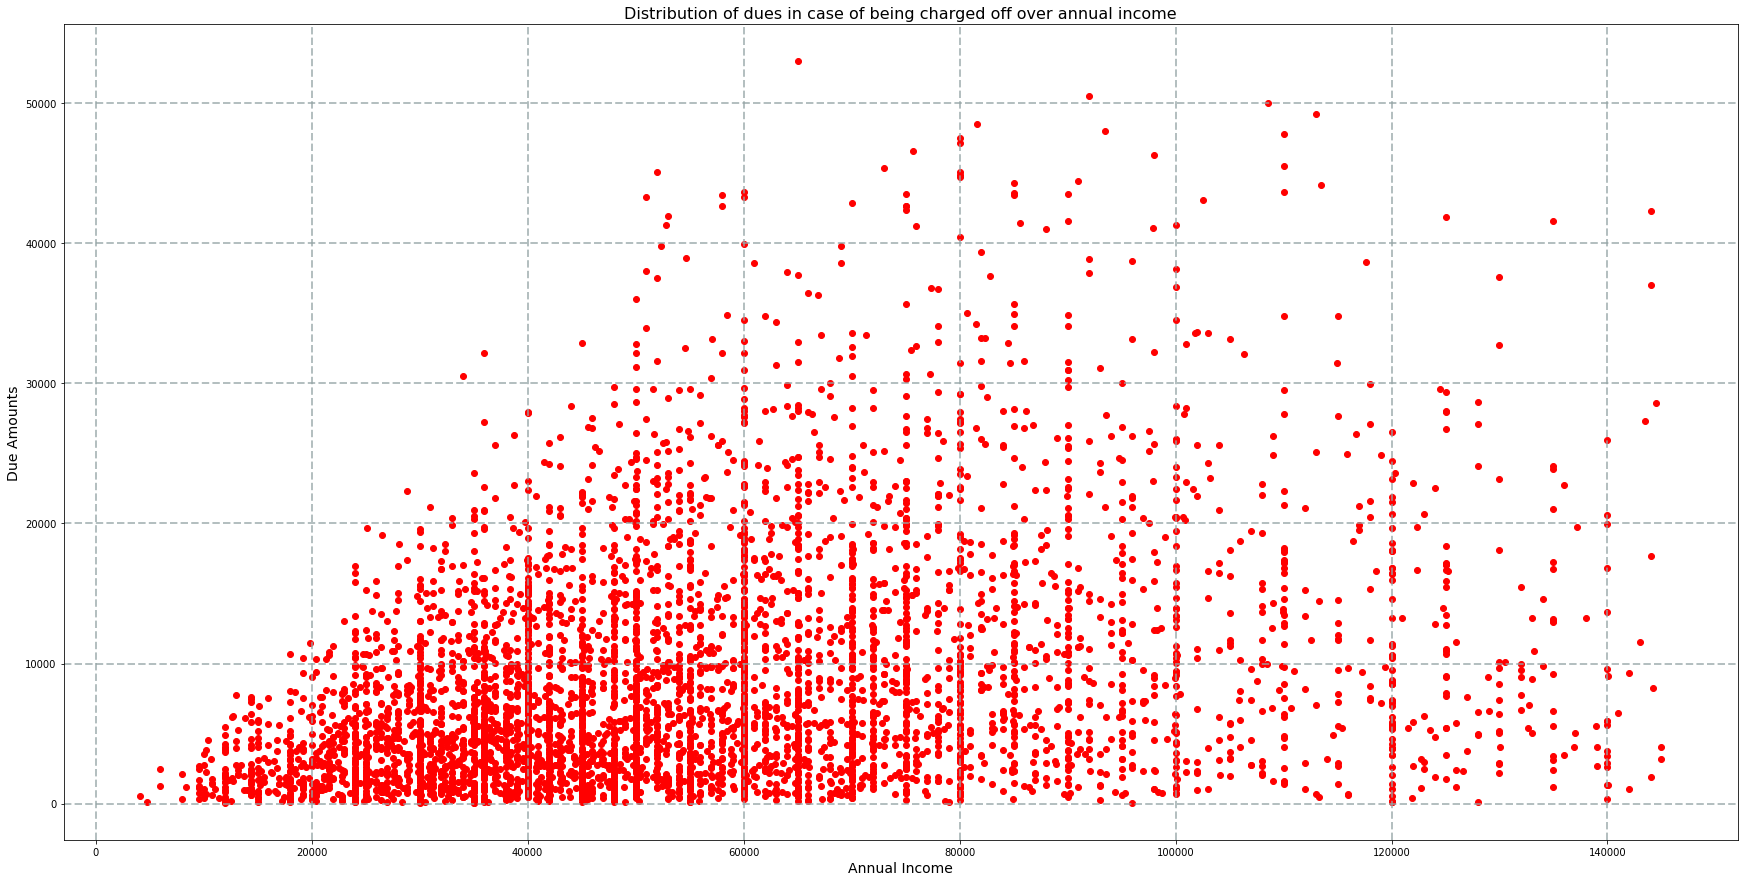

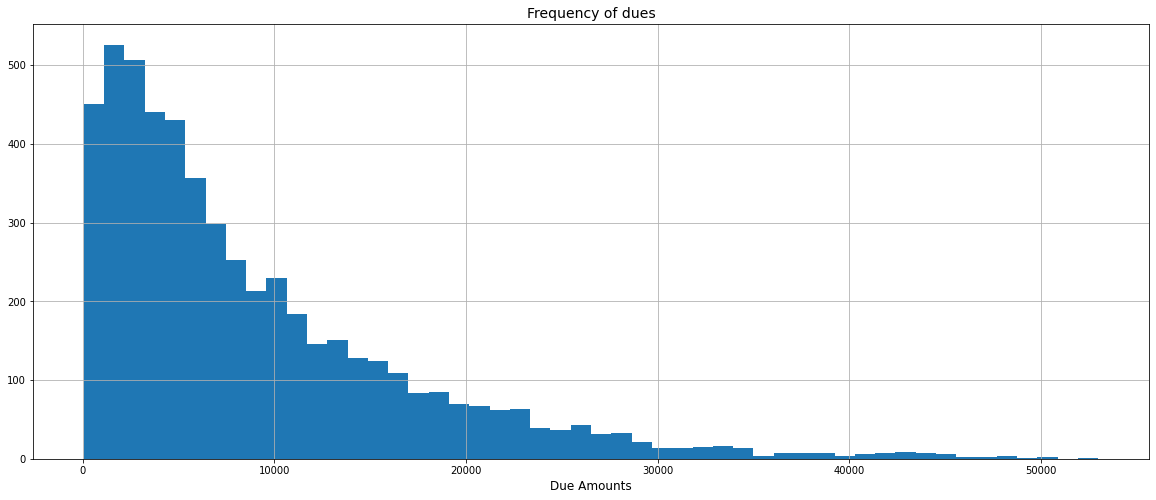

In [46]:
# Plot for Distribution of dues in case of being charged off over annual income
plt.figure(figsize=[30,15])
plt.scatter(df[df.loan_status=='Charged Off'].annual_inc,df[df.loan_status=='Charged Off'].due, color='r')
plt.title('Distribution of dues in case of being charged off over annual income', fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Due Amounts', fontsize=14)
plt.show()

print('\n\n')
# Plot for Frequency of dues
plt.figure(figsize=[20,8])
df.due.hist(bins=50)
plt.title('Frequency of dues', fontsize=14)
plt.xlabel('Due Amounts', fontsize=12)
plt.show()

### 3.1> <font color='green'><b>Annual Income over 50,000 USD tend to be defaulter of high amounts
### 3.2> <font color='green'><b>Most of the due occurences are of below 10,000 USD
### 3.3> <font color='green'><b>Most of the dues are committed by candidates with annual income within 60,000 USD.

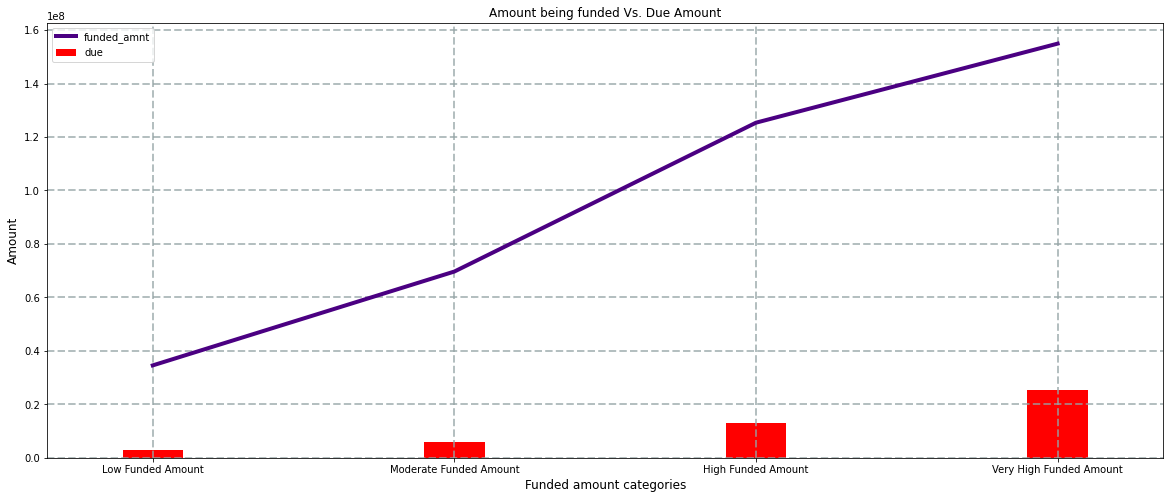

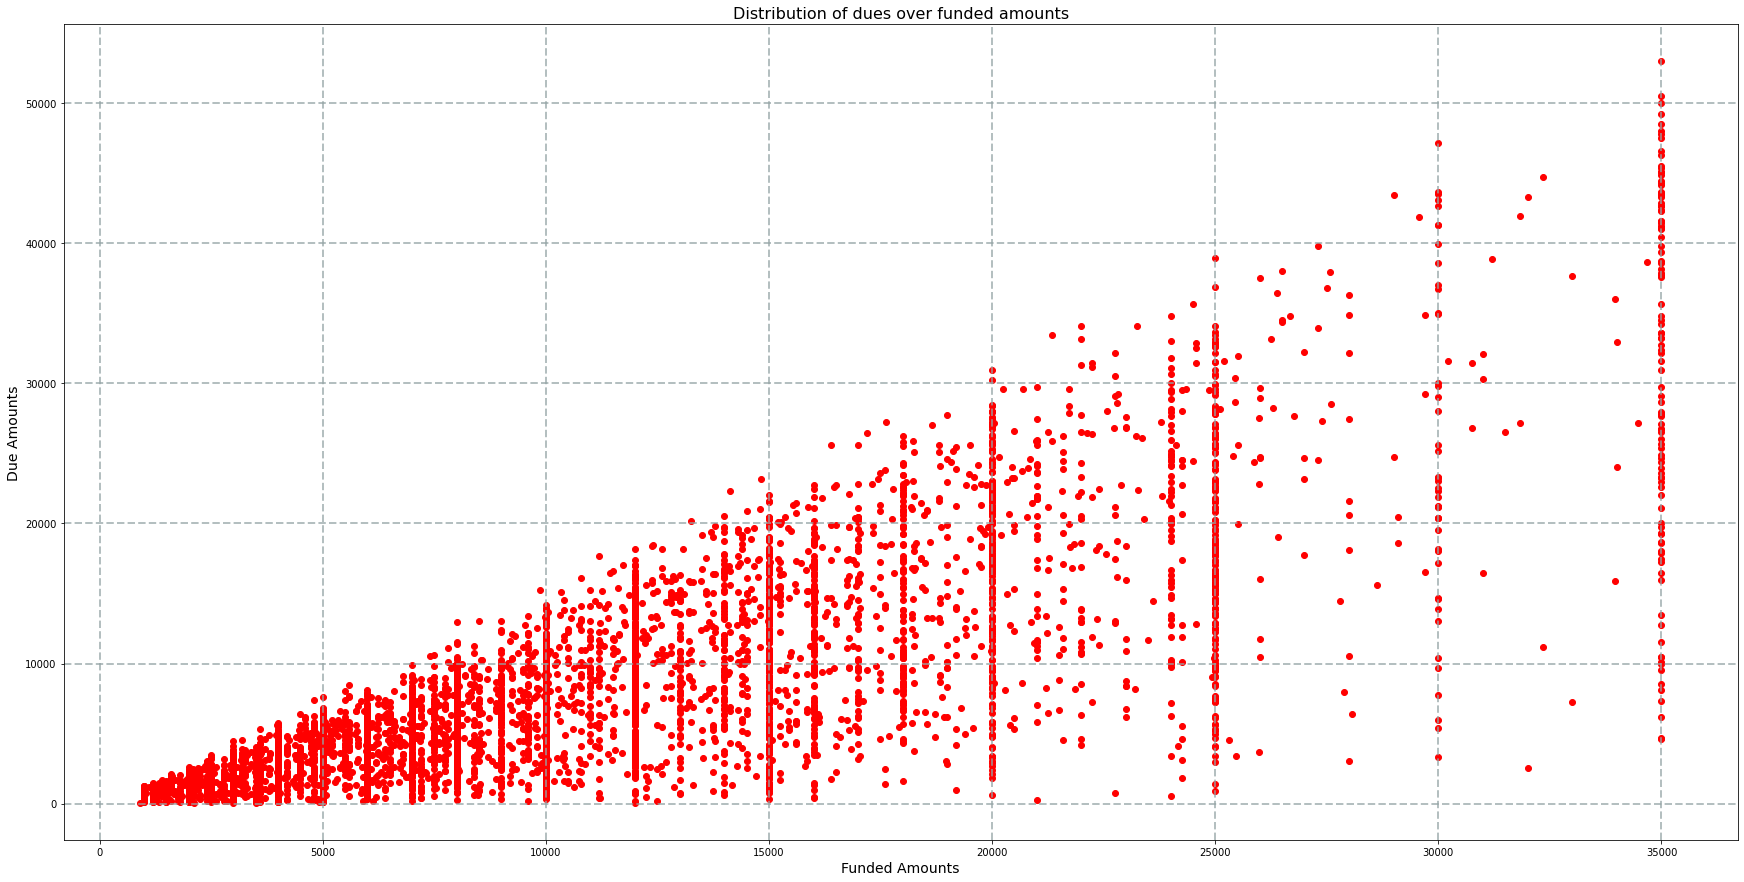

In [47]:
# Plot for Amount being funded Vs. Due
df[df.loan_status=='Charged Off'].groupby('funded_amnt_bkt').due.sum().plot(kind='bar', figsize=[20,8], width=0.2, color='r')
df.groupby('funded_amnt_bkt').funded_amnt.sum().plot(figsize=[20,8], color='#4b0082', linewidth=4)
plt.title('Amount being funded Vs. Due Amount')
plt.xticks(rotation = 0)
plt.xlabel('Funded amount categories', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.show()
print('\n\n')

# Plot for Distribution of dues over funded amounts
plt.figure(figsize=[30,15])
plt.scatter(df[df.loan_status=='Charged Off'].funded_amnt,df[df.loan_status=='Charged Off'].due, color='r')
plt.title('Distribution of dues over funded amounts', fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.xlabel('Funded Amounts', fontsize=14)
plt.ylabel('Due Amounts', fontsize=14)
plt.show()

### 3.4> <font color='green'><b>Most of the due occurences are of below 10,000 USD and committed by candidates with funding amount within 10,000 USD.

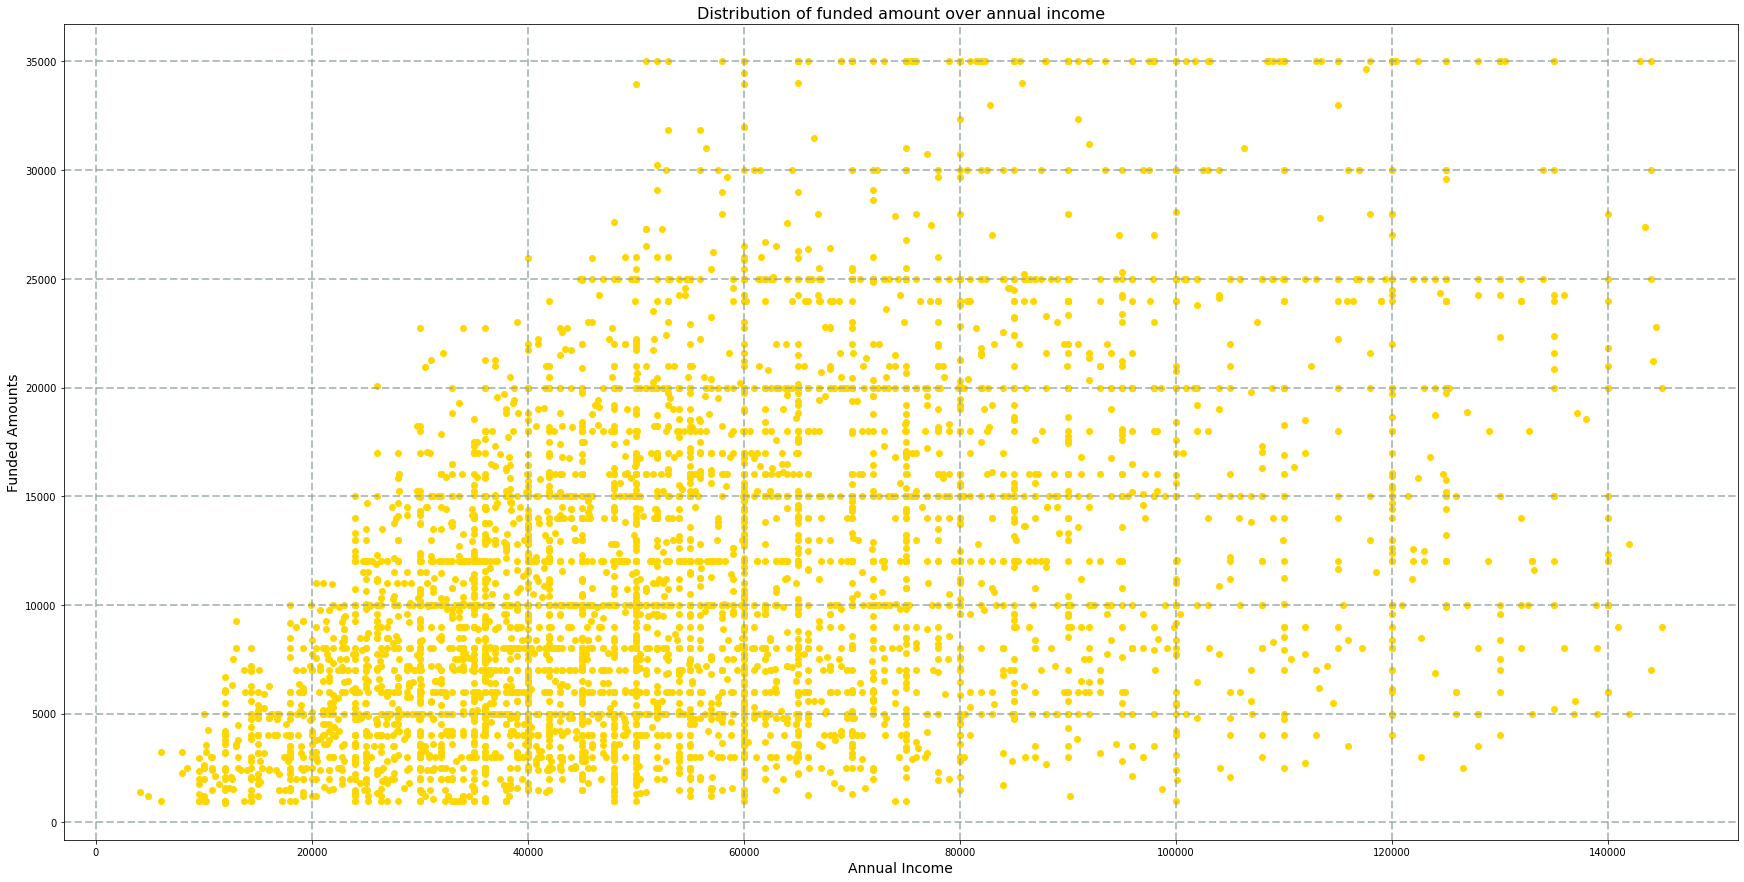

In [48]:
# Plot for Distribution of dues over annual income
plt.figure(figsize=[30,15])
plt.scatter(df[df.loan_status=='Charged Off'].annual_inc,df[df.loan_status=='Charged Off'].funded_amnt, color='gold')
plt.title('Distribution of funded amount over annual income', fontsize=16)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Funded Amounts', fontsize=14)
plt.show()

### 3.5> <font color='green'><b>Loan amount upto 10,000 USD has been sanctioned to almost all income groups uniformly
### 3.6> <font color='green'><b>Eligibility of funded amount is directly proportional to annual income<br>
### A quick look :-

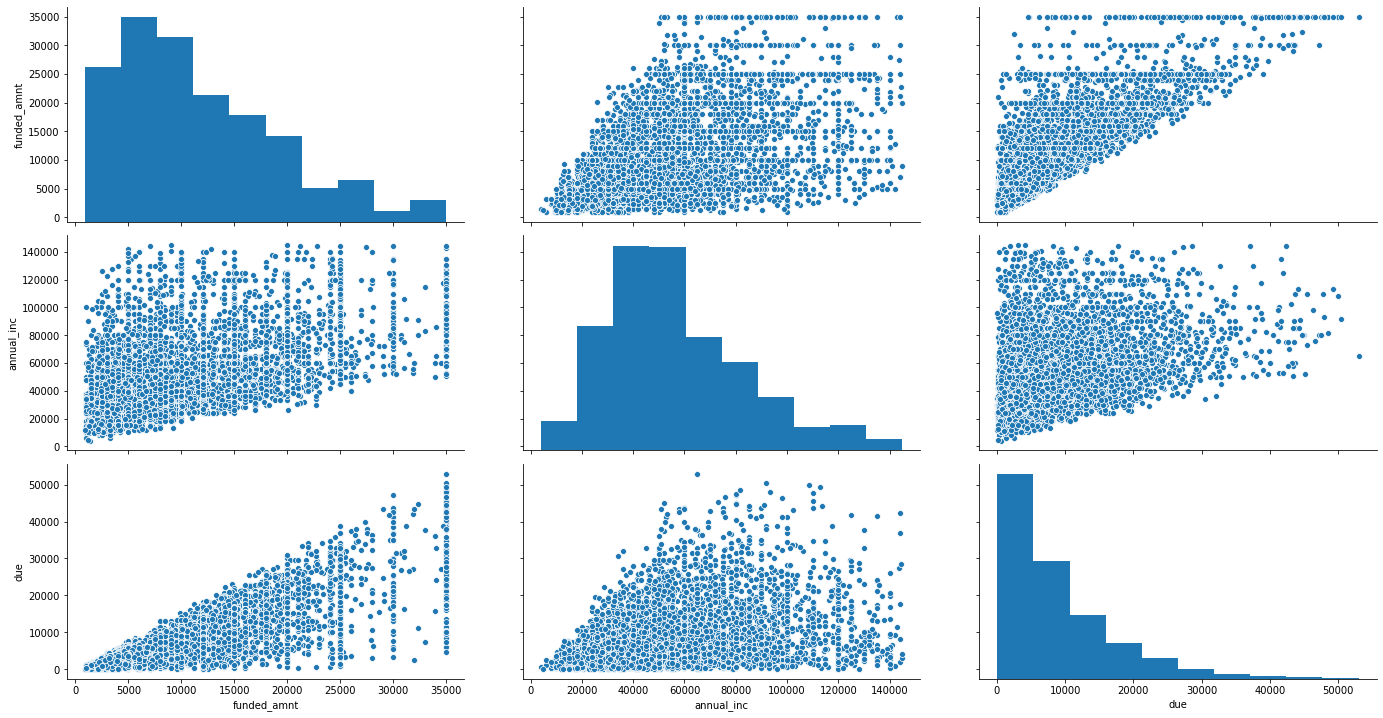

In [49]:
# Plot for Representation the co-relation of dues, annual income and funding amount
sns.pairplot(df[df.loan_status=='Charged Off'][['funded_amnt','annual_inc','due']]).fig.set_size_inches(20,10)
plt.show()

## Lets recall some other visualizations from before along with the above 3 adjacent graphs.
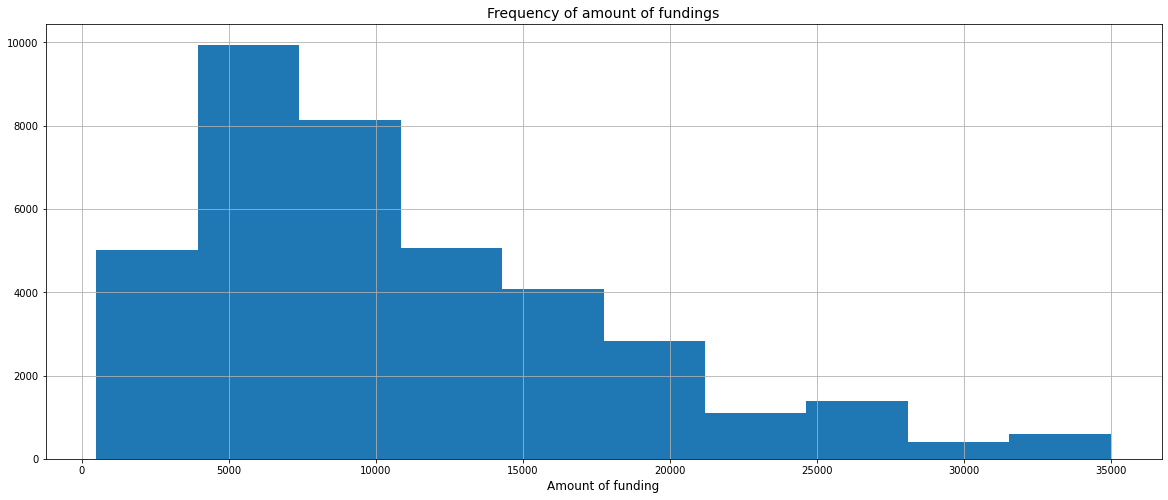
<br>
AND,<br>
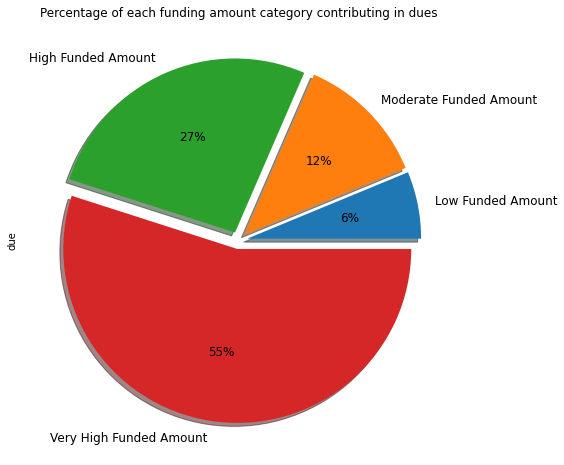

### 3.7> <font color='green'><b>Very high funded amounts have caused most of the monetary losses.

### 3.8><font color='green'><b> Lower Annual Income group of applicants often tend to be defaulters while probability of higher annual income applicants of being defaulter is less but if in case they end up being defaulter, they may cause huge loss

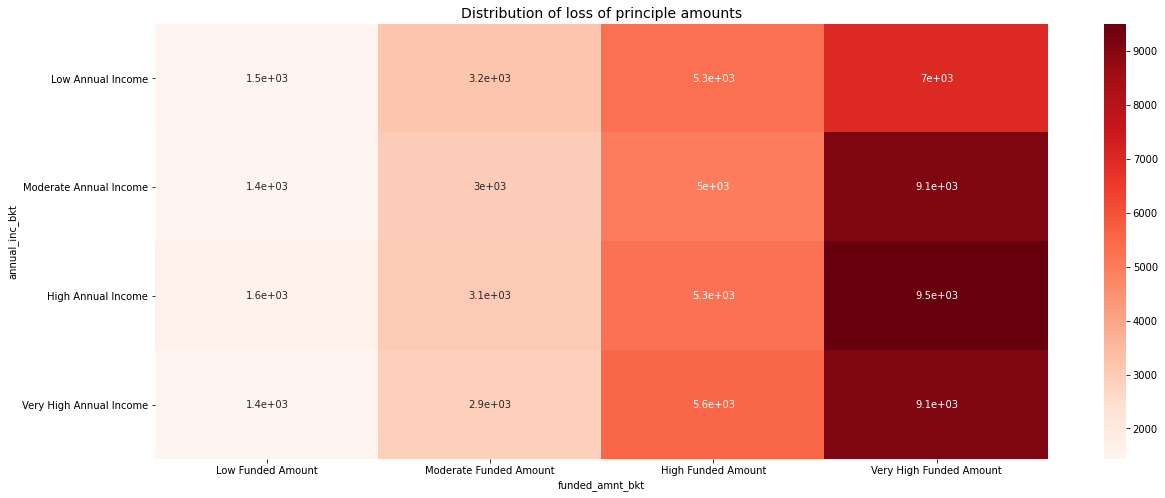

In [50]:
# Plot for Distribution of loss of principle amounts
prindue=pd.pivot_table(df, index='annual_inc_bkt', columns='funded_amnt_bkt', values='principle_due')

plt.figure(figsize=[20,8])
sns.heatmap(prindue, cmap='Reds', annot=True)
plt.title('Distribution of loss of principle amounts', fontsize=14)
plt.show()

### 3.9> <font color='green'><b>Most principle amount losses have occurred in very high funding amount category.

## 4><font color='blue'><u> State Analysis

In [51]:
# Fetching a dataset from an external website to get the full names corresponding to the state codes

stateCode= pd.read_html('https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971', match='Classification structure')[0]
stateCode.rename(columns={'Alpha code':'Alpha'}, inplace=True)
stateCode=stateCode[['State','Alpha']]
stateCode.head()

,State,Alpha
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [52]:
# Mapping the state names in the main data frame and removing the 'addr_state' column
test['state']=test.addr_state.apply(lambda x: stateCode[stateCode.Alpha==str(x)].iloc[0,0])
df['state']=df.addr_state.apply(lambda x: stateCode[stateCode.Alpha==str(x)].iloc[0,0])
df=df.drop('addr_state', axis=1)

In [53]:
df.head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,...,due,last_pymnt_m,last_pymnt_y,issue_m,issue_y,months_of_pymnt,funded_amnt_bkt,int_rate_bkt,annual_inc_bkt,state
0,1077501,1296599,5000,Fully Paid,5000,36,10.65,162.87,171.62,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,Low Funded Amount,Moderate Interest Rate,Low Annual Income,Arizona
1,1077430,1314167,2500,Charged Off,2500,60,15.27,59.83,119.66,Apr-13,...,2581.09,Apr,2013,Dec,2011,16.0,Low Funded Amount,Very High Interest Rate,Low Annual Income,Georgia
2,1077175,1313524,2400,Fully Paid,2400,36,15.96,84.33,649.91,Jun-14,...,NaN,Jun,2014,Dec,2011,30.0,Low Funded Amount,Very High Interest Rate,Low Annual Income,Illinois
3,1076863,1277178,10000,Fully Paid,10000,36,13.49,339.31,357.48,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,High Funded Amount,High Interest Rate,Moderate Annual Income,California
5,1075269,1311441,5000,Fully Paid,5000,36,7.90,156.46,161.03,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,Low Funded Amount,Low Interest Rate,Low Annual Income,Arizona


Top 10 states with most number 'Charged Off' status are :-

 ['California', 'Florida', 'New York', 'Texas', 'New Jersey', 'Georgia', 'Illinois', 'Pennsylvania', 'Virginia', 'Maryland'] 





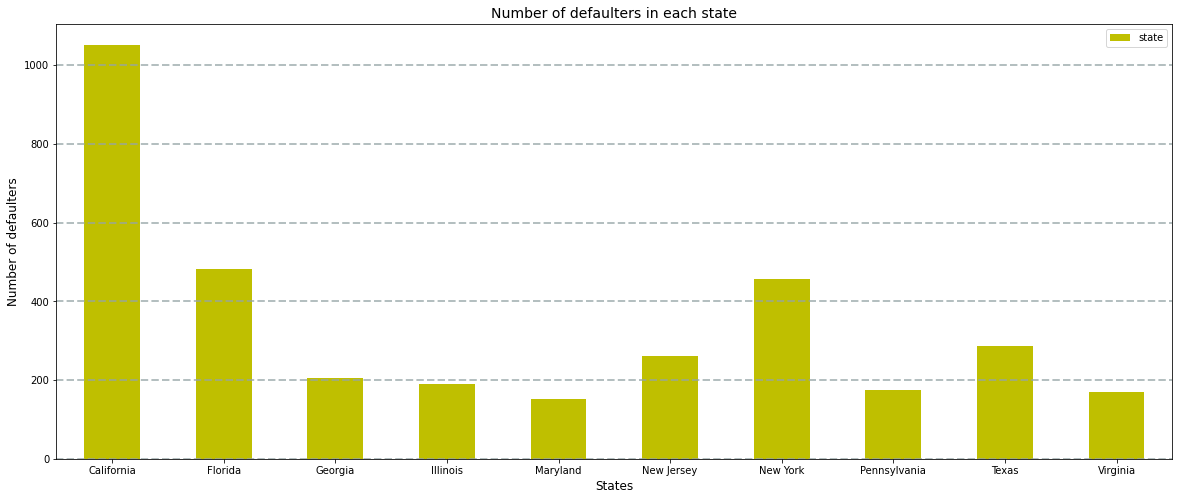

In [54]:
# Fetching the top 10 states with most defaulter counts
defaulterStatescount=pd.DataFrame(df[df.loan_status=='Charged Off'].state.value_counts()).nlargest(10, 'state')
print("Top 10 states with most number 'Charged Off' status are :-\n\n",list(defaulterStatescount.index),'\n\n\n')


# Plot for Number of defaulters in each state
defaulterStatescount.sort_index().plot.bar(figsize=[20,8], color='y')
plt.xticks(rotation=0)
plt.title('Number of defaulters in each state', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of defaulters', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

Top 10 states with largest amount and 'Charged Off' status are :-

 ['California', 'Florida', 'New York', 'Texas', 'New Jersey', 'Georgia', 'Illinois', 'Virginia', 'Ohio', 'Pennsylvania'] 





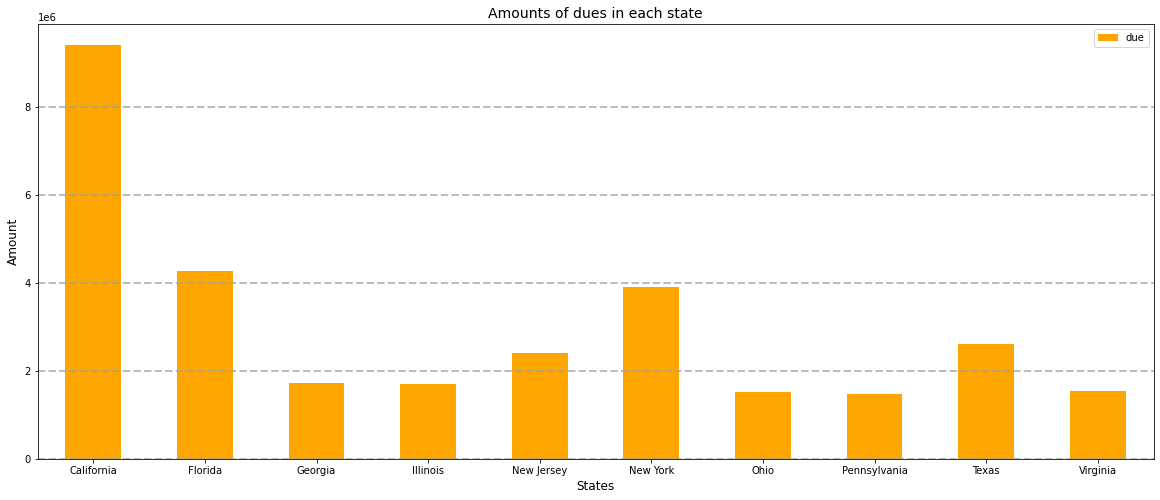

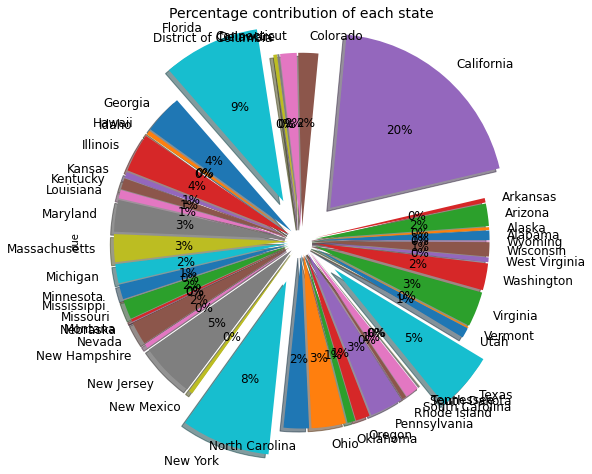

In [55]:
# Fetching the top 10 states with most loss amounts
defaulterStatesamount=pd.DataFrame(df[df.loan_status=='Charged Off'].groupby('state').due.sum()).nlargest(10,'due')
print("Top 10 states with largest amount and 'Charged Off' status are :-\n\n",list(defaulterStatesamount.index),'\n\n\n')


# Plot for Amounts of loss in each state
defaulterStatesamount.sort_index().plot.bar(figsize=[20,8], color='orange')
plt.xticks(rotation=0)
plt.title('Amounts of dues in each state', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

print('\n\n')



contrib=round((df[df.loan_status=='Charged Off'].groupby('state').due.sum()/df[df.loan_status=='Charged Off'].groupby('state').due.sum().sum())*100,2)
# The followinf piece of code is to set the explode parameters to point out the top 4 countries
explode=np.zeros(len(contrib))
notexpl=0.08
expl=0.25
explode[[4,9,-18,-8]]=expl
explode[explode!=expl]=notexpl

# Plot for Percentage contribution of each state
contrib.plot(kind='pie', figsize=[50,8], explode=explode, autopct="%.0f%%", fontsize=12, shadow=True)
plt.title('Percentage contribution of each state', fontsize=14)
plt.show()

In [56]:
# The top 4 countries to contribute in loss
top4count=defaulterStatescount.index[:4]
top4count

Index(['California', 'Florida', 'New York', 'Texas'], dtype='object')

### 4.1><font color='green'><b> The largest state to be charged off is <i>California</i> followed by <i>Florida</i>, <i>New York</i> and <i>Texas</i> based on both count and amount

In [57]:
# Creating a data frame that will contain only the top 4 countries
top4=df[df.state.isin(top4count)]
top4.head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,...,due,last_pymnt_m,last_pymnt_y,issue_m,issue_y,months_of_pymnt,funded_amnt_bkt,int_rate_bkt,annual_inc_bkt,state
3,1076863,1277178,10000,Fully Paid,10000,36,13.49,339.31,357.48,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,High Funded Amount,High Interest Rate,Moderate Annual Income,California
7,1072053,1288686,3000,Fully Paid,3000,36,18.64,109.43,111.34,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,Low Funded Amount,Very High Interest Rate,Moderate Annual Income,California
8,1071795,1306957,5600,Charged Off,5600,60,21.28,152.39,152.39,Apr-12,...,8497.38,Apr,2012,Dec,2011,4.0,Moderate Funded Amount,Very High Interest Rate,Low Annual Income,California
9,1071570,1306721,5375,Charged Off,5375,60,12.69,121.45,121.45,Nov-12,...,5810.81,Nov,2012,Dec,2011,11.0,Low Funded Amount,High Interest Rate,Low Annual Income,Texas
11,1069908,1305008,12000,Fully Paid,12000,36,12.69,402.54,6315.30,Sep-13,...,NaN,Sep,2013,Dec,2011,21.0,High Funded Amount,High Interest Rate,High Annual Income,California


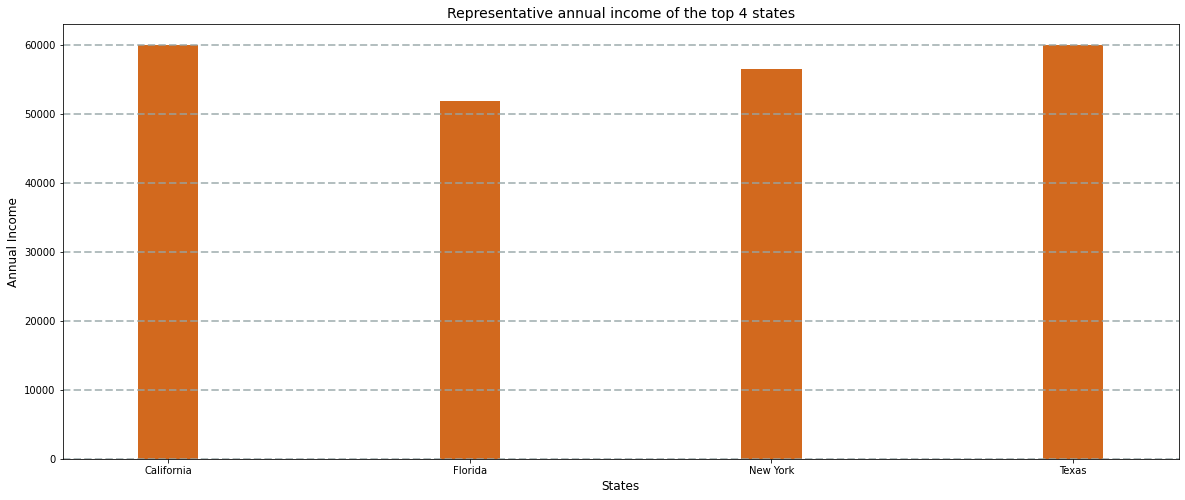

In [58]:
# Plot for Representative annual income of the top 4 states
top4.groupby('state').annual_inc.median().plot.bar(figsize=[20,8],width=0.2,color='chocolate')
plt.xticks(rotation=0)
plt.title('Representative annual income of the top 4 states', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [59]:
def status(s):
    req=pd.DataFrame(round((df[df.loan_status=='Charged Off'].groupby('state').due.sum()/df[df.loan_status=='Charged Off'].groupby('state').due.sum().sum())*100,2))
    print('Most customers from',top4.state.value_counts().index[s],'have a',top4[top4.state==top4.state.value_counts().index[s]].annual_inc_bkt.mode()[0],'receives a',top4[top4.state==top4.state.value_counts().index[s]].funded_amnt_bkt.mode()[0],'and together contribute to a loss of around',round(req.loc[top4.state.value_counts().index,:]).astype('int').iloc[s,0], '%\n')

status(0)
status(2)
status(1)
status(3)

Most customers from California have a High Annual Income receives a High Funded Amount and together contribute to a loss of around 20 %

Most customers from Florida have a Low Annual Income receives a Low Funded Amount and together contribute to a loss of around 9 %

Most customers from New York have a Moderate Annual Income receives a High Funded Amount and together contribute to a loss of around 8 %

Most customers from Texas have a Moderate Annual Income receives a High Funded Amount and together contribute to a loss of around 5 %



### 4.2> <font color='green'><b>These top 4 countries alone contribute for 42% of total loss

### 4.3>
### <font color='green'><b>Most customers from California have a High Annual Income receives a High Funded Amount and together contribute to a loss of around 20 %
### <font color='green'><b>Most customers from Florida have a Low Annual Income receives a Low Funded Amount and together contribute to a loss of around 9 %
### <font color='green'><b>Most customers from New York have a Moderate Annual Income receives a High Funded Amount and together contribute to a loss of around 8 %
### <font color='green'><b>Most customers from Texas have a Moderate Annual Income receives a High Funded Amount and together contribute to a loss of around 5 %



## 5> <font color='blue'><u>Time and Date Analysis

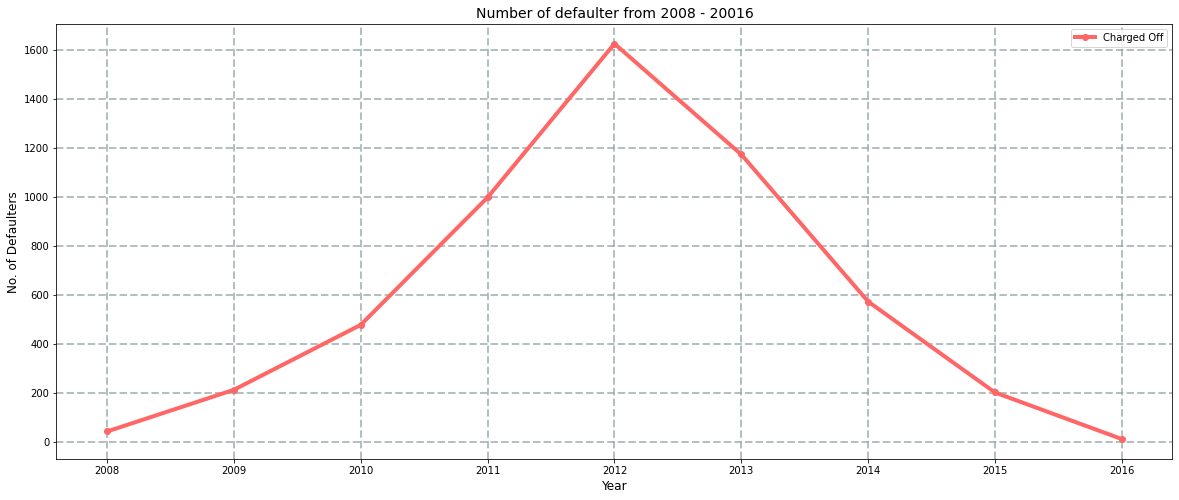

In [60]:
co=df[df.loan_status=='Charged Off']

plt.figure(figsize=(20,8))
plt.plot(co.last_pymnt_y.value_counts().sort_index(), '-o', color='#ff6666', linewidth=4, label='Charged Off')
plt.title('Number of defaulter from 2008 - 20016', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of Defaulters', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.legend()
plt.show()

### 5.1> <font color='green'><b>No. of applicants who stooped their installment and became defaulter increased dratically from 2008 to 2012 and then decreased till 2016. There is evidence which satisfies this.
Here is an extract provided below from the website- https://www.businesstoday.in/magazine/features/wilful-defaulter-loan-penal-action/story/192155.html , which suggests the same trend as observed above, however in India :-<br><br>
<b><i>'The track record suggests that a part of stressed assets turns into wilful defaulters. The value of suits filed against defaulters has more than doubled in five years to reach Rs 23,439 crore in 2011/12.'<br>

<img src= 'https://akm-img-a-in.tosshub.com/sites/btmt/images/stories//February2013/loan-default_lag_021213080403.jpg'>

In [61]:
# Applicants who have fully paid and taken the given time to repay
rightTime=df[(df.loan_status=='Fully Paid') & (((df.term==36)&(df.months_of_pymnt<=36)) | ((df.term==60)&(df.months_of_pymnt<=60)))]
rightTime.head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,...,due,last_pymnt_m,last_pymnt_y,issue_m,issue_y,months_of_pymnt,funded_amnt_bkt,int_rate_bkt,annual_inc_bkt,state
2,1077175,1313524,2400,Fully Paid,2400,36,15.96,84.33,649.91,Jun-14,...,NaN,Jun,2014,Dec,2011,30.0,Low Funded Amount,Very High Interest Rate,Low Annual Income,Illinois
6,1069639,1304742,7000,Fully Paid,7000,60,15.96,170.08,1313.76,May-16,...,NaN,May,2016,Dec,2011,54.0,Moderate Funded Amount,Very High Interest Rate,Moderate Annual Income,North Carolina
10,1070078,1305201,6500,Fully Paid,6500,60,14.65,153.45,1655.54,Jun-13,...,NaN,Jun,2013,Dec,2011,18.0,Moderate Funded Amount,Very High Interest Rate,High Annual Income,Arizona
11,1069908,1305008,12000,Fully Paid,12000,36,12.69,402.54,6315.30,Sep-13,...,NaN,Sep,2013,Dec,2011,21.0,High Funded Amount,High Interest Rate,High Annual Income,California
17,1069971,1304884,3600,Fully Paid,3600,36,6.03,109.57,583.45,May-13,...,NaN,May,2013,Dec,2011,17.0,Low Funded Amount,Low Interest Rate,Very High Annual Income,Connecticut


In [62]:
# Applicants who have fully paid but taken more than the given time to repay
wrongTime=df[(df.loan_status=='Fully Paid') & (((df.term==36)&(df.months_of_pymnt>36)) | ((df.term==60)&(df.months_of_pymnt>60)))]
wrongTime.head()

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,...,due,last_pymnt_m,last_pymnt_y,issue_m,issue_y,months_of_pymnt,funded_amnt_bkt,int_rate_bkt,annual_inc_bkt,state
0,1077501,1296599,5000,Fully Paid,5000,36,10.65,162.87,171.62,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,Low Funded Amount,Moderate Interest Rate,Low Annual Income,Arizona
3,1076863,1277178,10000,Fully Paid,10000,36,13.49,339.31,357.48,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,High Funded Amount,High Interest Rate,Moderate Annual Income,California
5,1075269,1311441,5000,Fully Paid,5000,36,7.90,156.46,161.03,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,Low Funded Amount,Low Interest Rate,Low Annual Income,Arizona
7,1072053,1288686,3000,Fully Paid,3000,36,18.64,109.43,111.34,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,Low Funded Amount,Very High Interest Rate,Moderate Annual Income,California
13,1069866,1304956,3000,Fully Paid,3000,36,9.91,96.68,102.43,Jan-15,...,NaN,Jan,2015,Dec,2011,38.0,Low Funded Amount,Moderate Interest Rate,Low Annual Income,Illinois


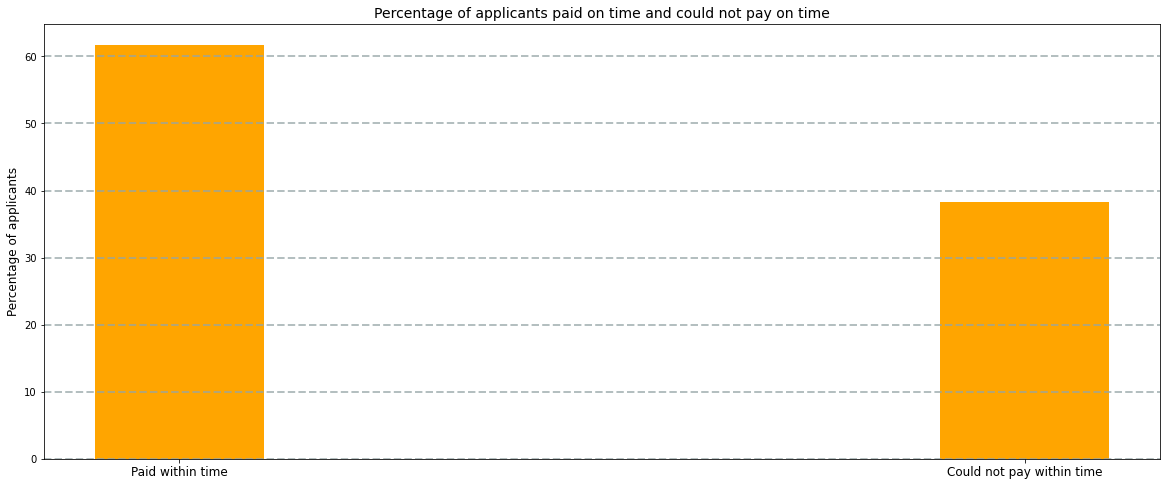

61.75 % of applicants could repay the loan within time whereas 38.25 % of applicants could not repay the loan within time.




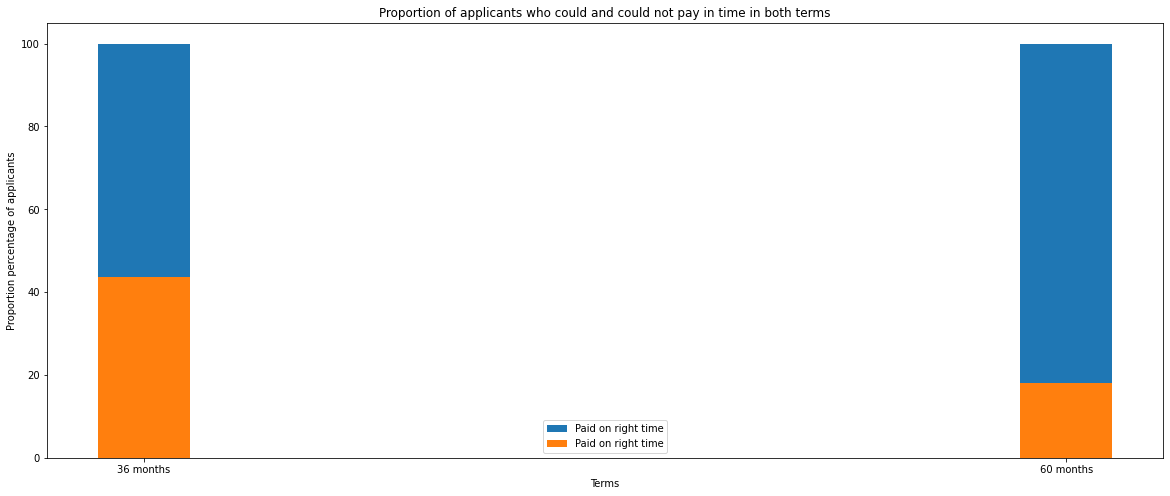

56.34 % of applicants who opted for 36 months term could pay the loan within time whereas 81.84 % of applicants who opted for 60 months term could pay the loan within time.


In [63]:
plt.figure(figsize=[20,8])
plt.bar(np.arange(2),[(len(rightTime)/len(df[df.loan_status=='Fully Paid']))*100,(len(wrongTime)/len(df[df.loan_status=='Fully Paid']))*100],0.2, color='orange')
plt.xticks(np.arange(2), ['Paid within time', 'Could not pay within time'], fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Percentage of applicants paid on time and could not pay on time', fontsize=14)
plt.ylabel('Percentage of applicants', fontsize=12)
plt.show()
print(round((len(rightTime)/len(df[df.loan_status=='Fully Paid']))*100,2),'% of applicants could repay the loan within time whereas',round((len(wrongTime)/len(df[df.loan_status=='Fully Paid']))*100,2),'% of applicants could not repay the loan within time.\n\n')


n=0.1
bar1= np.arange(2)

plots = lambda n,df: round((len(df[df.term==n])/(len(rightTime[rightTime.term==n])+len(wrongTime[wrongTime.term==n])))*100,2)

plt.figure(figsize=[20,8])
plt.bar(bar1,[plots(36,rightTime)+plots(36,wrongTime),plots(60,rightTime)+plots(60,wrongTime)],n,label='Paid on right time')
plt.bar(bar1,[plots(36,wrongTime),plots(60,wrongTime)],n,label='Paid on right time')
plt.xticks(bar1, ['36 months', '60 months'])
plt.xlabel('Terms')
plt.ylabel('Proportion percentage of applicants')
plt.title('Proportion of applicants who could and could not pay in time in both terms')
plt.legend()
plt.show()
print(plots(36,rightTime),'% of applicants who opted for 36 months term could pay the loan within time whereas',plots(60,rightTime),'% of applicants who opted for 60 months term could pay the loan within time.')

### 5.2> <font color='green'><b>61.75 % of applicants could repay the loan within time whereas 38.25 % of applicants could not repay the loan within time.
### 5.3> <font color='green'><b>56.34 % of applicants who opted for 36 months term could pay the loan within time whereas 81.84 % of applicants who opted for 60 months term could pay the loan within time.

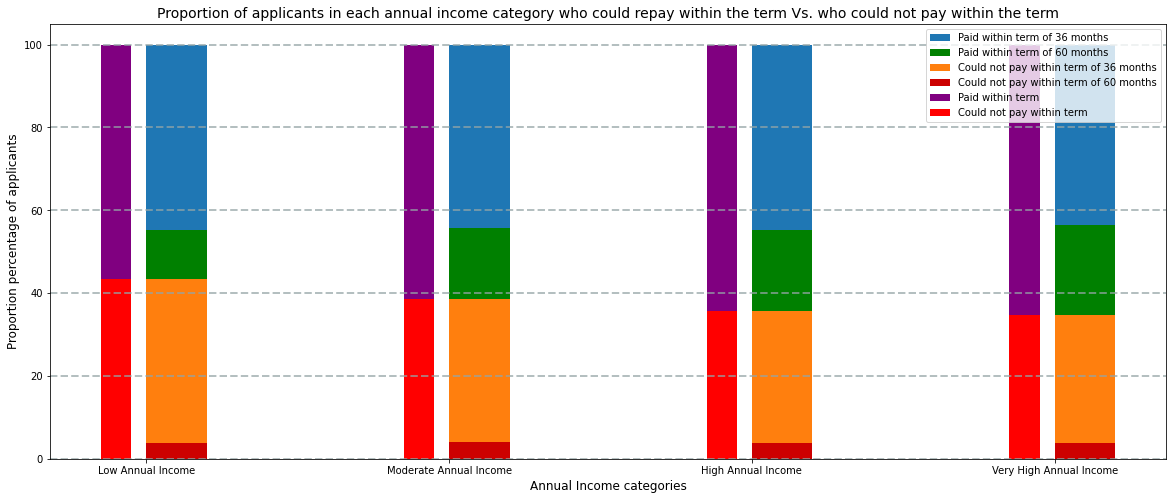

Among the part of the population who fully paid the loan, in Low Annual Income category, around 56.47 % applicants paid within time.
 44.83 % of total population belongs to the group who opted for 36 months term and paid within time and 11.65 % belongs to the group who opted for 60 months term and paid within time.

Among the part of the population who fully paid the loan, in Moderate Annual Income category, around 61.34 % applicants paid within time.
 44.2 % of total population belongs to the group who opted for 36 months term and paid within time and 17.14 % belongs to the group who opted for 60 months term and paid within time.

Among the part of the population who fully paid the loan, in High Annual Income category, around 64.28 % applicants paid within time.
 44.75 % of total population belongs to the group who opted for 36 months term and paid within time and 19.53 % belongs to the group who opted for 60 months term and paid within time.

Among the part of the population who full

In [64]:
n=0.2
bar1= np.arange(4)
bar2=[i+n for i in bar1]
bar3=[i+n for i in bar2]
bar4=[i+n for i in bar3]


plots = lambda n,df: (df[df.term==n].annual_inc_bkt.value_counts()/(rightTime[rightTime.term==36].annual_inc_bkt.value_counts()+wrongTime[wrongTime.term==36].annual_inc_bkt.value_counts()+rightTime[rightTime.term==60].annual_inc_bkt.value_counts()+wrongTime[wrongTime.term==60].annual_inc_bkt.value_counts()))*100

plt.figure(figsize=[20,8])
plt.bar(bar2,plots(36,rightTime)+plots(60,rightTime)+plots(36,wrongTime)+plots(60,wrongTime),n,label='Paid within term of 36 months')
plt.bar(bar2,plots(60,rightTime)+plots(36,wrongTime)+plots(60,wrongTime),n,label='Paid within term of 60 months',color='g')
plt.bar(bar2,plots(36,wrongTime)+plots(60,wrongTime),n,label='Could not pay within term of 36 months')
plt.bar(bar2,plots(60,wrongTime),n,label='Could not pay within term of 60 months',color='#cc0000')



plots2 = lambda df: round((df.annual_inc_bkt.value_counts().sort_index()/(rightTime.annual_inc_bkt.value_counts().sort_index()+wrongTime.annual_inc_bkt.value_counts().sort_index()))*100,2)

plt.bar(bar1,plots2(rightTime)+plots2(wrongTime),n-0.1,label='Paid within term',color='purple')
plt.bar(bar1,plots2(wrongTime),n-0.1,label='Could not pay within term',color='r')

plt.xticks(bar1+(n/2), df.annual_inc_bkt.value_counts().sort_index().index)
plt.title('Proportion of applicants in each annual income category who could repay within the term Vs. who could not pay within the term', fontsize=14)
plt.xlabel('Annual Income categories',fontsize=12)
plt.ylabel('Proportion percentage of applicants',fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()


def summary(n):
    print('Among the part of the population who fully paid the loan, in',plots2(rightTime).index[n],'category, around',round(plots2(rightTime)[n],2),'% applicants paid within time.\n',round(plots(36,rightTime)[n],2),'% of total population belongs to the group who opted for 36 months term and paid within time and',round(plots(60,rightTime)[n],2),'% belongs to the group who opted for 60 months term and paid within time.\n')

summary(0)
summary(1)
summary(2)
summary(3)

### 5.4> <font color='green'><b>Percentage of applicants opted for 36 months who failed to repay within time decreases with increase in annual income.
### <font color='green'><b>Percentage of applicants opted for 60 months who could repay the within time increases with increase in annual income.<br>
### 5.5> <font color='green'><b>Percentage of applicants opted for 36 months who could repay the loan and the percentage of applicants opted for 60 months who failed to repay within time does not have any significance relativeness with the annual income.

In [65]:
wrongTime[(wrongTime.term==36)].groupby('funded_amnt_bkt').months_of_pymnt.describe()

,count,mean,std,min,25%,50%,75%,max
funded_amnt_bkt,,,,,,,,
Low Funded Amount,3518.0,37.561114,0.887207,37.0,37.0,38.0,38.0,68.0
Moderate Funded Amount,3041.0,37.524827,0.738592,37.0,37.0,37.0,38.0,54.0
High Funded Amount,2882.0,37.533657,1.202109,37.0,37.0,37.0,38.0,71.0
Very High Funded Amount,1365.0,37.581685,1.719762,37.0,37.0,37.0,38.0,70.0


In [66]:
wrongTime[(wrongTime.term==60)].groupby('funded_amnt_bkt').months_of_pymnt.describe()

,count,mean,std,min,25%,50%,75%,max
funded_amnt_bkt,,,,,,,,
Low Funded Amount,239.0,61.514644,0.685071,61.0,61.0,61.0,62.0,68.0
Moderate Funded Amount,306.0,61.480392,0.556283,61.0,61.0,61.0,62.0,63.0
High Funded Amount,370.0,61.505405,0.580835,61.0,61.0,61.0,62.0,65.0
Very High Funded Amount,296.0,61.506757,0.627036,61.0,61.0,61.0,62.0,67.0


### 5.6> <font color='green'><b>It can be said that for 36 months term, applicants roughly takes at most 38 years and 60 months' applicants take 62 years, i.e, 2 years more becomes the hard deadline for loan repayment. Otherwise there could be a chance of being defaulter. 

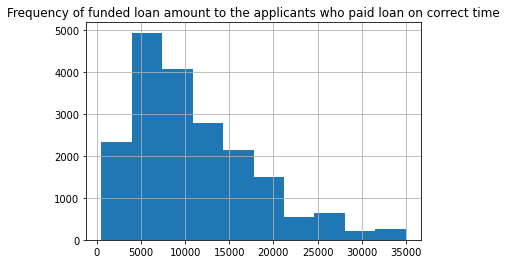

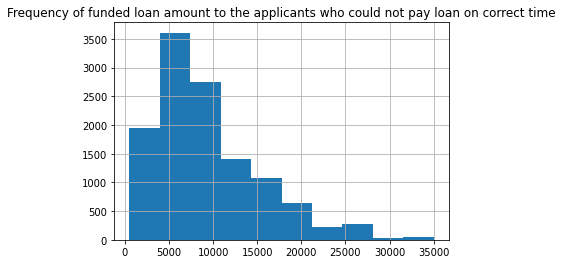

In [67]:
rightTime.funded_amnt.hist()
plt.title('Frequency of funded loan amount to the applicants who paid loan on correct time')
plt.show()
print('\n')
wrongTime.funded_amnt.hist()
plt.title('Frequency of funded loan amount to the applicants who could not pay loan on correct time')
plt.show()

### 5.7> <font color='green'><b>There is no significance difference in the trend or pattern of loan amounts funded to the timely and untimely payers.

## 6> <font color='blue'><u>Home Ownership Analysis

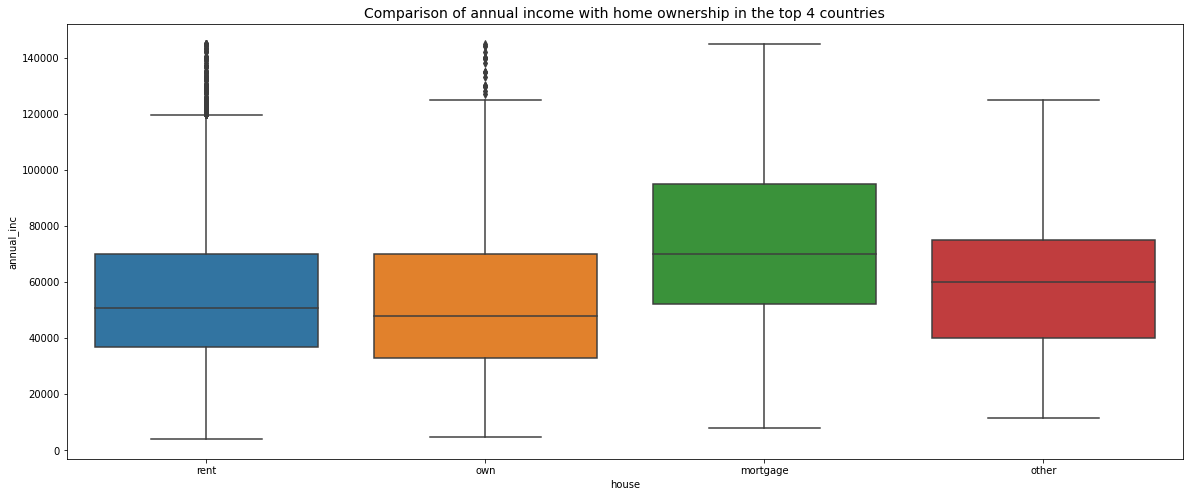

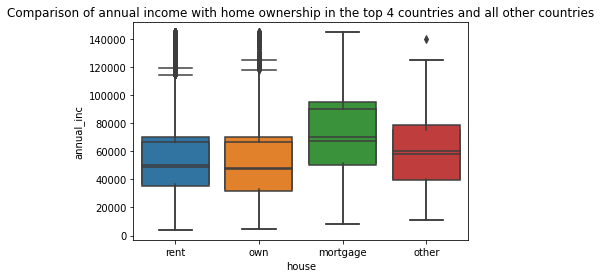

In [68]:
plt.figure(figsize=[20,8])
sns.boxplot(top4.house, top4.annual_inc)
plt.title('Comparison of annual income with home ownership in the top 4 countries', fontsize=14)
plt.show()
print('\n')

sns.boxplot(top4.house, top4.annual_inc)
sns.boxplot(df.house, df.annual_inc)
plt.title('Comparison of annual income with home ownership in the top 4 countries and all other countries')
plt.show()

### 6.1> <font color='green'><b>Trend of house ownership is almost similar all over
### 6.2> <font color='green'><b>We can say, that high salaried applicants usually have their house mortgaged or vice-versa. From the past experience in Annual Income analysis, it is obvious that Higher annual income groups definitely received larger amounts of loan. Therefore, there is a slim chance that due to burden of the mortgage, they end up being defaulter.

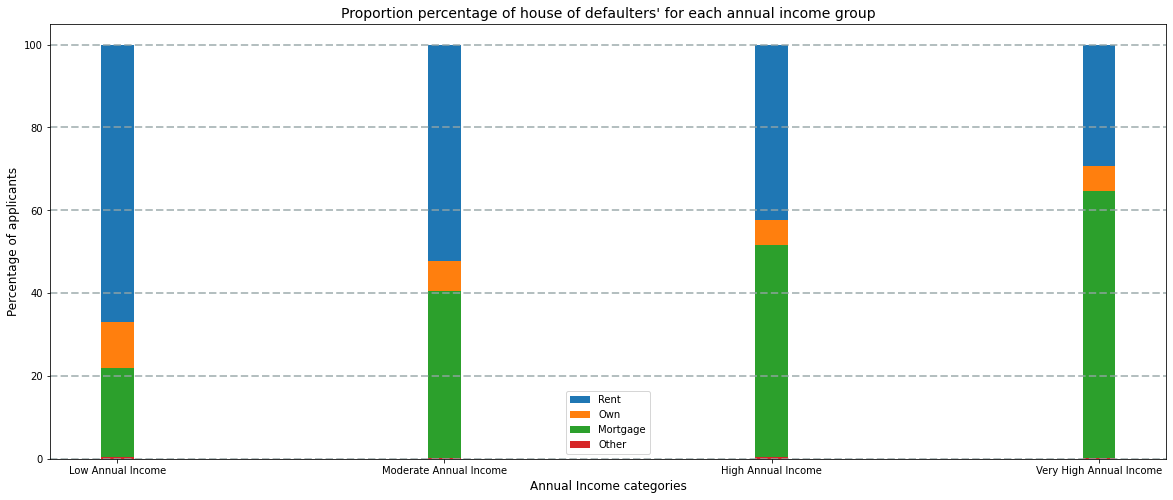

In [69]:
n=0.1
bar1=np.arange(len(df[(df.loan_status=='Charged Off')].annual_inc_bkt.value_counts()))

plt.figure(figsize=[20,8])
# sns.countplot(x='annual_inc_bkt', hue='house', data=df[df.loan_status=='Charged Off'])

inc=np.array([len(df[(df.loan_status=='Charged Off')&(df.annual_inc_bkt=='Low Annual Income')]),len(df[(df.loan_status=='Charged Off')&(df.annual_inc_bkt=='Moderate Annual Income')]),len(df[(df.loan_status=='Charged Off')&(df.annual_inc_bkt=='High Annual Income')]),len(df[(df.loan_status=='Charged Off')&(df.annual_inc_bkt=='Very High Annual Income')])])
plots= lambda x: (df[(df.loan_status=='Charged Off')&(df.house==str(x))].annual_inc_bkt.value_counts().sort_index()/inc)*100

plt.bar(bar1,plots('rent')+plots('own')+plots('mortgage')+plots('other'),n,label='Rent')
plt.bar(bar1,plots('own')+plots('mortgage')+plots('other'),n,label='Own')
plt.bar(bar1,plots('mortgage')+plots('other'),n,label='Mortgage')
plt.bar(bar1,plots('other'),n,label='Other')

plt.xticks(bar1,df[(df.loan_status=='Charged Off')].annual_inc_bkt.unique().sort_values())
plt.title("Proportion percentage of house of defaulters' for each annual income group", fontsize=14)
plt.ylabel('Percentage of applicants', fontsize=12)
plt.xlabel('Annual Income categories', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()

### 6.3> <font color='green'><b>With increase in annual income, rented house owners decrease whereas mortgage house owners increase.

## 7> <font color='blue'><u>Grade Analysis

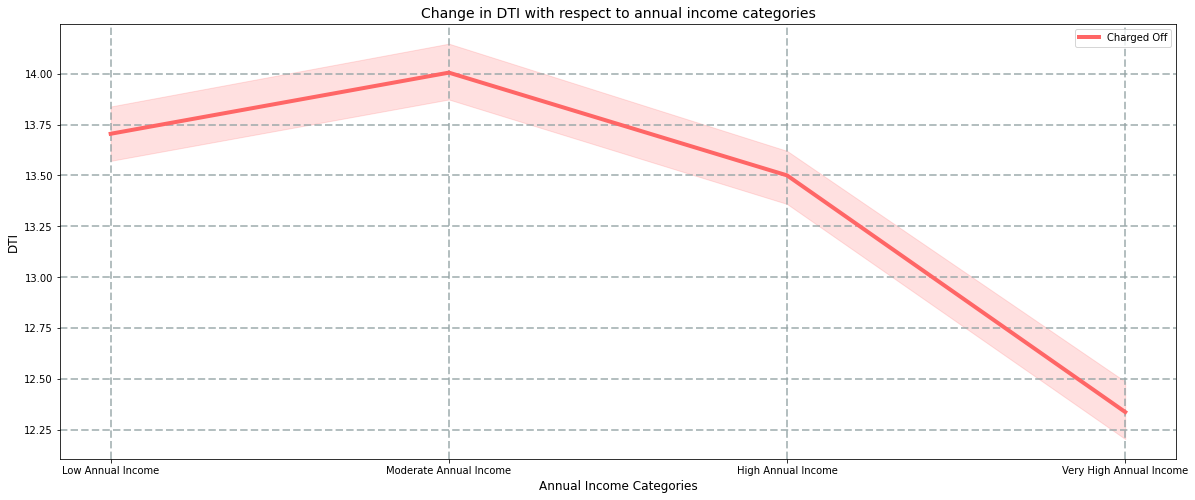

In [70]:
plt.figure(figsize=[20,8])
sns.lineplot(df.annual_inc_bkt,df.dti, color='#ff6666', linewidth=4, label='Charged Off')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.title('Change in DTI with respect to annual income categories',fontsize=14)
plt.xlabel('Annual Income Categories',fontsize=12)
plt.ylabel('DTI',fontsize=12)
plt.show()

### 7.1> <font color='green'><b>Debt to Income ratio (DTI) decreases with increase in annual income.

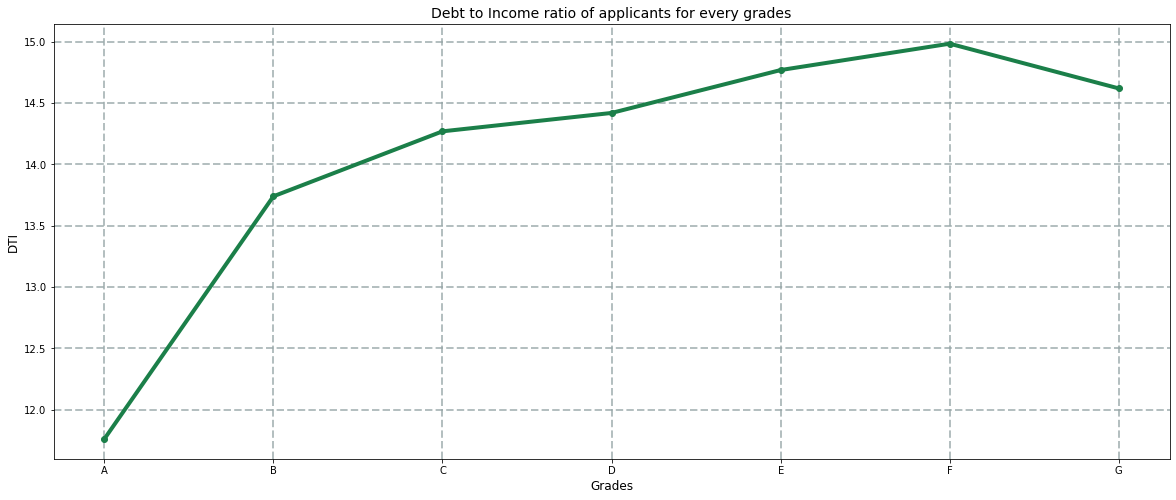

In [71]:
plt.figure(figsize=[20,8])
plt.plot(df.groupby('grade').dti.median(),'-o', color='#1b7f49',linewidth=4)
plt.title('Debt to Income ratio of applicants for every grades', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Grades', fontsize=12)
plt.ylabel('DTI', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.show()

### 7.2> <font color='green'><b>Grade of an applicant deteriorates with increase in DTI.

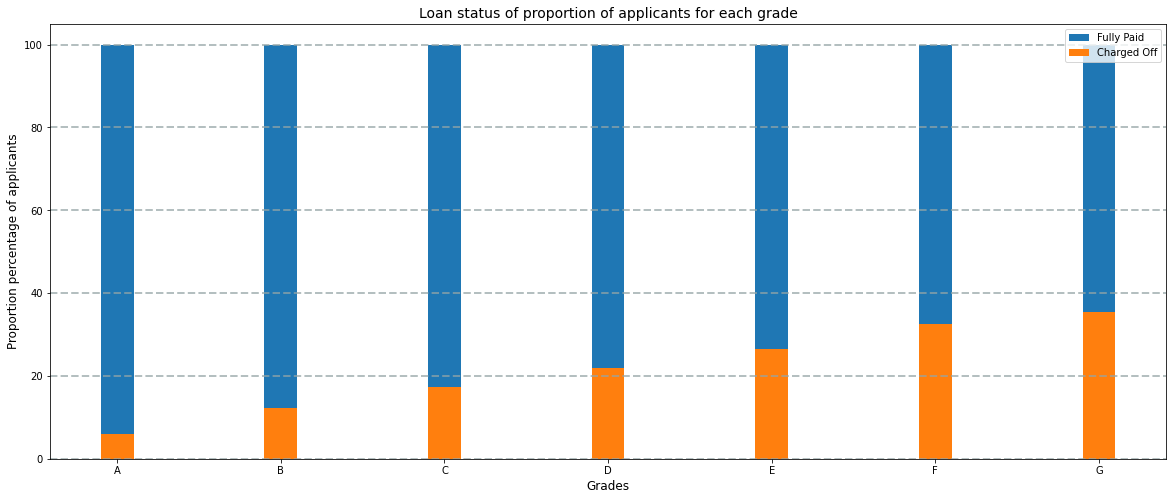

In [72]:
n=0.2
bar1=np.arange(len(df[df.loan_status=='Charged Off'].grade.value_counts()))

plots= lambda x: (df[df.loan_status==str(x)].grade.value_counts()/(df[df.loan_status=='Fully Paid'].grade.value_counts()+df[df.loan_status=='Charged Off'].grade.value_counts()))*100

plt.figure(figsize=[20,8])
plt.bar(bar1,((plots('Fully Paid')/(plots('Fully Paid')+plots('Charged Off')))*100)+((plots('Charged Off')/(plots('Fully Paid')+plots('Charged Off')))*100),n,label='Fully Paid')
plt.bar(bar1,((plots('Charged Off')/(plots('Fully Paid')+plots('Charged Off')))*100),n,label='Charged Off')
plt.title('Loan status of proportion of applicants for each grade',fontsize=14)
plt.xlabel('Grades',fontsize=12)
plt.ylabel('Proportion percentage of applicants',fontsize=12)
plt.xticks(bar1, df[df.loan_status=='Charged Off'].grade.value_counts().sort_index().index)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show()

### 7.3> <font color='green'><b>Percentage of defaulters increases with deterioration of grades.</font>
### 7.4> <font color='green'><b>Therefore, it can be said that increase in DTI poses threat.

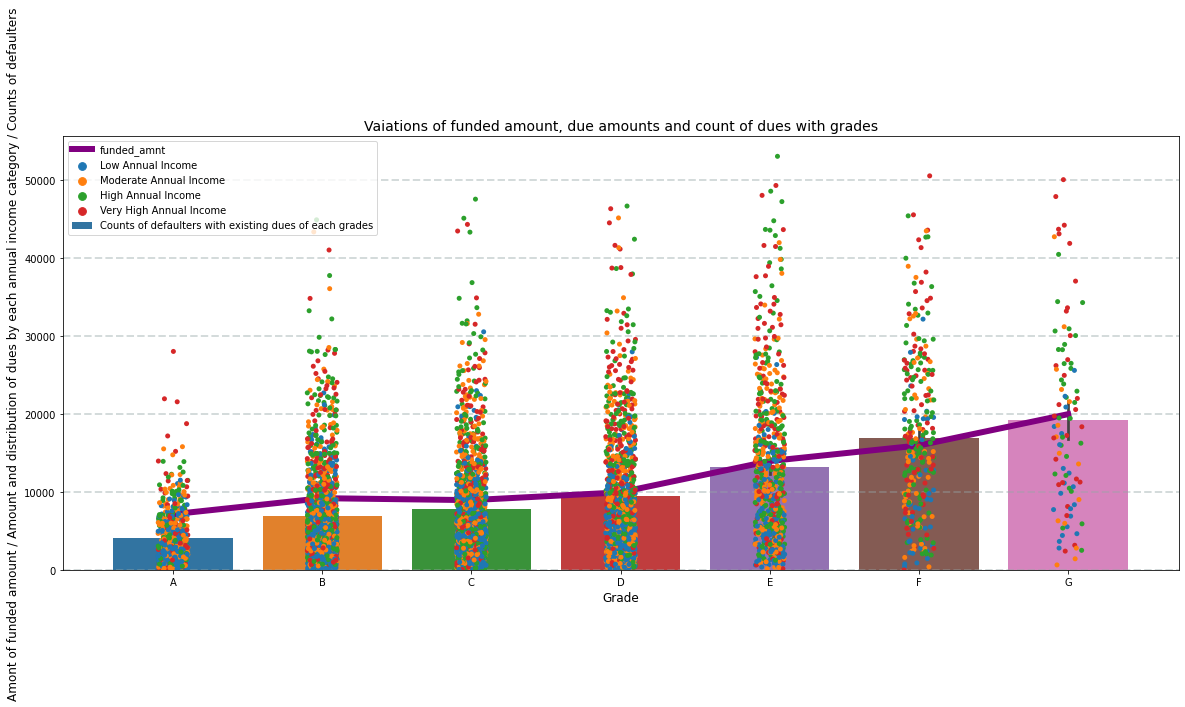

Representative funding amount of grade A is 7200
Representative funding amount of grade B is 9250
Representative funding amount of grade C is 9000
Representative funding amount of grade D is 10000
Representative funding amount of grade E is 14000
Representative funding amount of grade F is 16000
Representative funding amount of grade G is 20000


In [73]:
plt.figure(figsize=[20,8])

sns.stripplot(x='grade',y='due',data=df[df.loan_status=='Charged Off'],hue='annual_inc_bkt',order=df.sort_values('grade').grade.unique(),jitter=0.1)
sns.barplot(x='grade', y='due', data=df[df.loan_status=='Charged Off'],order=df.sort_values('grade').grade.unique(),label='Counts of defaulters with existing dues of each grades')
df.groupby('grade').funded_amnt.median().plot(linewidth=6,color='purple')

plt.xlabel('Grade',fontsize=12)
plt.title('Vaiations of funded amount, due amounts and count of dues with grades',fontsize=14)
plt.ylabel('Amont of funded amount / Amount and distribution of dues by each annual income category / Counts of defaulters',fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.4)
plt.legend()
plt.show()


gradefund= lambda x: 'Representative funding amount of grade '+str(x)+' is '+str(df.groupby('grade').funded_amnt.median()[str(x)])
print(gradefund('A'))
print(gradefund('B'))
print(gradefund('C'))
print(gradefund('D'))
print(gradefund('E'))
print(gradefund('F'))
print(gradefund('G'))

### 7.5> <font color='green'><b>With deterioration of grades, funded amount, overall due amounts value and due counts increase in case of being charged off.

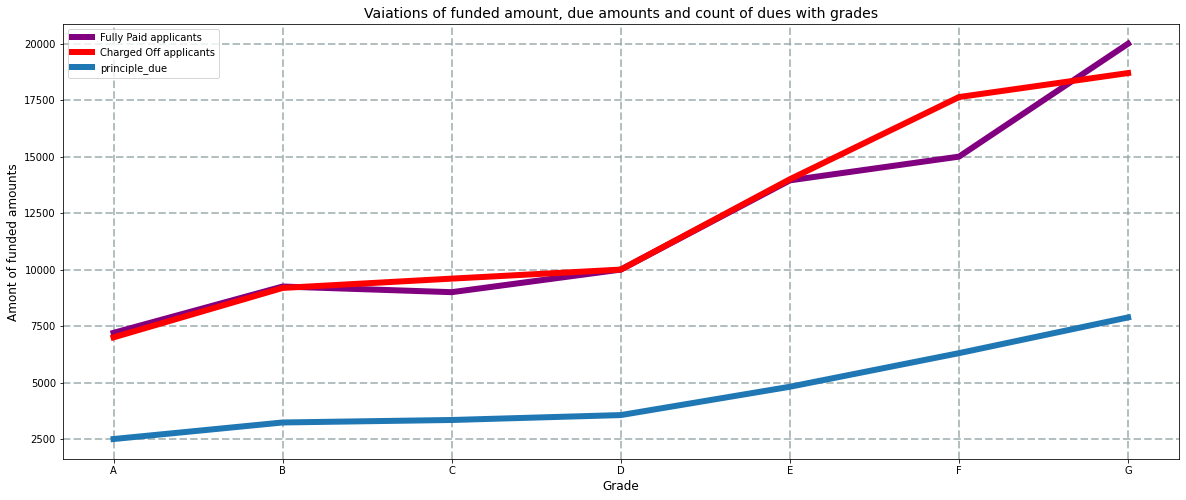

In [74]:
plt.figure(figsize=[20,8])

df[df.loan_status=='Fully Paid'].groupby('grade').funded_amnt.median().plot(linewidth=6,color='purple',label='Fully Paid applicants')
df[df.loan_status=='Charged Off'].groupby('grade').funded_amnt.median().plot(linewidth=6,color='red',label='Charged Off applicants')
df.groupby('grade').principle_due.median().plot(linewidth=6)

plt.xlabel('Grade',fontsize=12)
plt.title('Vaiations of funded amount, due amounts and count of dues with grades',fontsize=14)
plt.ylabel('Amont of funded amounts',fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.legend()
plt.show()

### 7.6> <font color='green'><b>Based on the observations, it can be said that grades 'E', 'F' and 'G' usually receive significantly larger funded amounts (greater than median of non defaulter applicants) who have caused fairly large number and amount of dues.

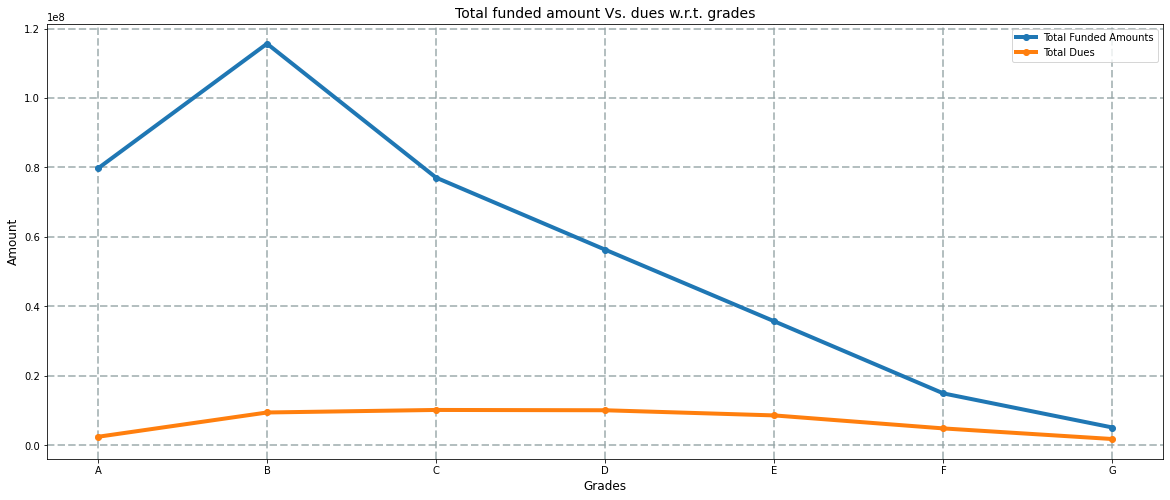

In [75]:
plt.figure(figsize=[20,8])
plt.plot(df.groupby('grade').funded_amnt.sum(),'-o',linewidth=4,label='Total Funded Amounts')
plt.plot(df.groupby('grade').due.sum(),'-o',linewidth=4,label='Total Dues')
plt.title('Total funded amount Vs. dues w.r.t. grades',fontsize=14)
plt.xlabel('Grades',fontsize=12)
plt.ylabel('Amount',fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.legend()
plt.show()

### 7.7> <font color='green'><b>With deterioration of grades, total funded amount decreased but the dues remained almost consistent.

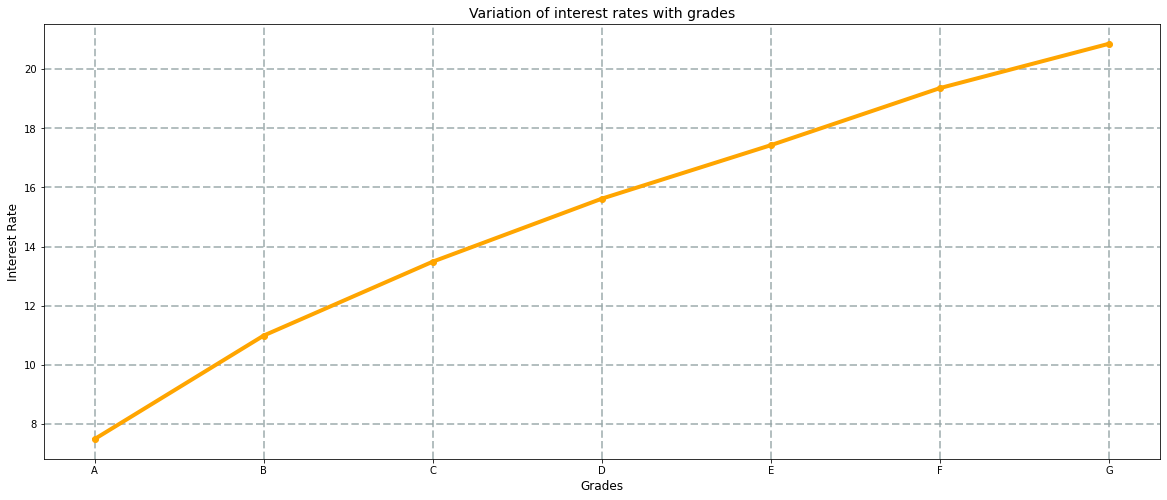

In [76]:
plt.figure(figsize=[20,8])
plt.plot(df.groupby('grade').int_rate.median(),'-o',linewidth=4,color='orange')
plt.title('Variation of interest rates with grades',fontsize=14)
plt.ylabel('Interest Rate',fontsize=12)
plt.xlabel('Grades',fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.7)
plt.show()

### 7.8> <font color='green'><b>Interest rate is inversely proportional to grades.

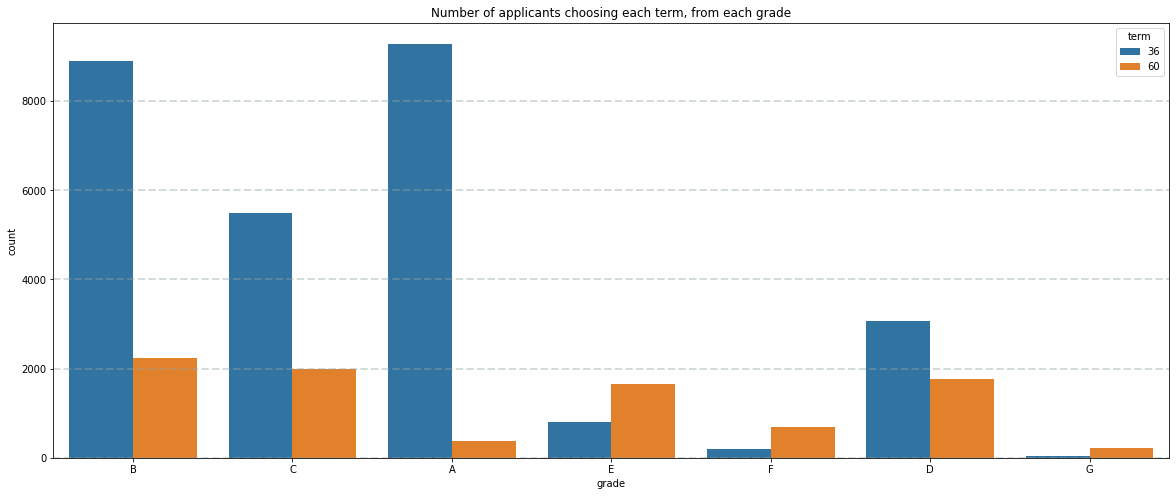

In [77]:
plt.figure(figsize=[20,8])
sns.countplot(x='grade',hue='term',data=df)
plt.title('Number of applicants choosing each term, from each grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.4)
plt.show()

### 7.9> <font color='green'><b>Lower grade applicants tend to go for 60 months plan more often.

## <font color='blue'><u>Recommendations

### <font color='#b7d127'><b>Following is the summary of all the patterns and trends observed throughout based on which future decisions can be taken. All these points have already been mentioned above with appropriate graphs. :-

In [78]:
# Making the 'test' data frame contain only 'Current' loan status entries in order to estimate the upcoming
# number of defaulters
test = test[test.loan_status=='Current']

In [79]:
test.head(20)

,id,member_id,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,...,due,last_pymnt_m,last_pymnt_y,issue_m,issue_y,months_of_pymnt,funded_amnt_bkt,int_rate_bkt,annual_inc_bkt,state
4,1075358,1311748,3000,Current,3000,60,12.69,67.79,67.79,May-16,...,NaN,May,2016,Dec,2011,54.0,Low Funded Amount,High Interest Rate,High Annual Income,Oregon
32,1065420,1299514,10000,Current,10000,60,15.96,242.97,242.97,May-16,...,NaN,May,2016,Dec,2011,54.0,High Funded Amount,Very High Interest Rate,Low Annual Income,Florida
39,1069346,1304237,12500,Current,12500,60,12.69,282.44,282.44,May-16,...,NaN,May,2016,Dec,2011,54.0,High Funded Amount,High Interest Rate,Low Annual Income,Illinois
86,1063958,1297940,14000,Current,14000,60,17.27,349.98,349.98,May-16,...,NaN,May,2016,Dec,2011,54.0,High Funded Amount,Very High Interest Rate,Low Annual Income,Washington
95,1068575,1303001,15300,Current,15300,60,22.06,423.10,423.10,May-16,...,NaN,May,2016,Dec,2011,54.0,Very High Funded Amount,Very High Interest Rate,Very High Annual Income,Virginia
99,1067874,1302235,6000,Current,6000,60,12.69,135.57,135.57,May-16,...,NaN,May,2016,Dec,2011,54.0,Moderate Funded Amount,High Interest Rate,High Annual Income,Colorado
101,1034693,1264291,16000,Current,16000,60,17.58,402.65,402.65,May-16,...,NaN,May,2016,Dec,2011,54.0,Very High Funded Amount,Very High Interest Rate,High Annual Income,Kansas
184,1046969,1277832,11000,Current,11000,60,13.49,253.06,253.06,May-16,...,NaN,May,2016,Dec,2011,54.0,High Funded Amount,High Interest Rate,Very High Annual Income,California
217,1066664,1300858,21000,Current,11800,60,17.27,294.98,294.98,May-16,...,NaN,May,2016,Dec,2011,54.0,High Funded Amount,Very High Interest Rate,Very High Annual Income,New Jersey
218,1066659,1300852,16000,Current,16000,60,17.27,399.97,399.97,May-16,...,NaN,May,2016,Dec,2011,54.0,Very High Funded Amount,Very High Interest Rate,Moderate Annual Income,Texas


In [80]:
# Below function is used to generate conditions of becoming defaulter and form a data frame out of 'test' dataset
def loan(d):    
    
    LowInc= (d.annual_inc_bkt=='Low Annual Income')
    ModerateInc= (d.annual_inc_bkt=='Moderate Annual Income')
    HighInc= (d.annual_inc_bkt=='High Annual Income')
    VhighInc= (d.annual_inc_bkt=='Very High Annual Income')

    Lowfund= (d.funded_amnt_bkt=='Low Funded Amount')
    Moderatefund= (d.funded_amnt_bkt=='Moderate Funded Amount')
    Highfund= (d.funded_amnt_bkt=='High Funded Amount')
    Vhighfund= (d.funded_amnt_bkt=='Very High Funded Amount')

    Lowint= (d.int_rate_bkt=='Low Interest Rate')
    Moderateint= (d.int_rate_bkt=='Moderate Interest Rate')
    Highint= (d.int_rate_bkt=='High Interest Rate')
    Vhighint= (d.int_rate_bkt=='Very High Interest Rate')

    month36= (d.term==36)
    month60= (d.term==60)

    topstate= (d.state.isin(top4count))

    cal= ((d.state=='California') & (d.annual_inc_bkt=='High Annual Income') & (d.funded_amnt_bkt=='High Funded Amount'))
    flo= ((d.state=='Florida') & (d.annual_inc_bkt=='Low Annual Income') & (d.funded_amnt_bkt=='Low Funded Amount'))
    ny= ((d.state=='New York') & (d.annual_inc_bkt=='Moderate Annual Income') & (d.funded_amnt_bkt=='High Funded Amount'))
    tex= ((d.state=='Texas') & (d.annual_inc_bkt=='Moderate Annual Income') & (d.funded_amnt_bkt=='High Funded Amount'))

    gra= (d.grade.isin(['E','F','G']))
    
    # Enter the condition below -----------------------------------------------------------------------------------------------------------------------------------------------------

    condition = (cal|flo|ny|tex) | ((LowInc&(Highfund|Vhighfund))|(ModerateInc&Vhighfund)) | (LowInc & (Highint|Vhighint))     |          (Vhighint & Vhighfund)               | (gra&(LowInc|ModerateInc))
    #           Condition for states         Condition for income and loan amounts     Condition for income and interest rate    Condition for loan amounts and interest rates    Condition for grades and income


    # -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    return d[condition]

 

# Below function applies the above generated condition to check if the input 'id' is included in the conditioned
# data frame or not and prints message accordingly
def decision(memid):
    condition = lambda x: True if test[test.id==x].iloc[0,0] in list(loan(test).id) else False

    if condition(memid) == True:
        print('Loan application of Applicant ID -',memid,'should have been rejected.')
    else:
        print('Applicant ID -',memid,'will possibly not be a defaulter.')



print('Among the applicants whose loan status is current have roughly a chance of at most',round((len(list(loan(test).id))/len(test))*100),'% of the population to be defaulter.')  

Among the applicants whose loan status is current have roughly a chance of at most 50 % of the population to be defaulter.


### <font color='green'><b>Among the applicants whose loan status is current have roughly a chance of at most 50 % of the population to be defaulter.

### <font color='purple'><b>Enter any 'id' of 'Current' loan status applicant to check a very rough estimation if the applicant is likely to be a defaulter or not, based on the observed patterns and trends :-

In [81]:
# Applicant ID = 1065420
decision(1065420)

Loan application of Applicant ID - 1065420 should have been rejected.


In [82]:
decision(977277)

Applicant ID - 977277 will possibly not be a defaulter.
